In this notebook, we describe a focused AI approach for modeling heterogeneous catalysts based on subgroup discovery (SGD) and on the sure-independence screening and sparsifying operator (SISSO) symbolic-regression approach. The notebook allows reproducing and modifying the analysis described in detail in:

<div style="padding: 1ex; margin-top: 1ex; margin-bottom: 1ex; border-style: dotted; border-width: 1pt; border-color: blue; border-radius: 3px;">
J. M. Mauß, K. Kley, R. Khobragade, N-K. Tran, J. De Bellis, F. Schüth, M. Scheffler, L. Foppa: <span style="font-style: italic;">"Modeling Time-On-Stream Catalyst Reactivity in the Selective Hydrogenation of Concentrated Acetylene Streams Under Industrial Conditions via Experiments and AI"</span>, ChemRxiv,10.26434/chemrxiv-2025-vf7hd-v2 (2025) <a href="https://chemrxiv.org/engage/chemrxiv/article-details/67ea84986dde43c908d79032" target="_blank">[Paper]</a>.
</div>


# Introduction

# Subgroup Discovery
The SGD approach is based on a data set containing a target quantity of interest and many candidate descriptive parameters, whose values are known for all the samples in the data set. In the context of heterogeneous catalysis, the target quantity relates to the materials' function of interest (e.g., its activity) and the candidate descriptive parameters characterize the materials as well as the underlying processes that are potentially relevant for the considered function. 
From this data set, SGD generates of a pool of propositions, statements about the candidate descriptive parameters that apply only to a portion of the data set. For the case of continuous parameters, the propositions are inequalities describing constraints on the values of the descriptive parameters. Then, SGD identifies selectors, statements formed by a number of propositions combined via the “AND” connector (denoted “∧”), that result in the selection of subgroups of data points associated with the most outstanding distributions of the target values. The quality function $Q(SG,P)$ measures how outstanding a SG is. It has the form 

\begin{equation}
 Q(SG,P) = \frac{s(SG)}{s(P)}* u(SG,P)
\end{equation} 

where the first term, the coverage, contains the ratio between the number of data points in the subgroup, $s(SG)$, and the total number of data points in the whole data set, $s(P)$. This coverage term controls the subgroup size and prevents that very small SGs with little statistical significance are selected. The second term, $u(SG,P)$, is called utility function and it measures the dissimilarity between the SG and the whole data set, referred to as the population, $P$. 

The propositions entering the selectors resulting in the highest $Q(SG,P)$ values, and thus in the most outstanding SGs, can be seen as rules describing the exceptional SG behavior and reflecting the relevant underlying processes particularly related to the exceptional behavior. The parameters entering these propositions are, in turn, the key, most relevant, parameters associated with the outstanding SG performance, out of all the initially offered ones. Because the SG search is performed by maximizing a function measuring how outstanding specific subselections of data points are, this approach identifies a local behavior.

The SGD approach is presented in further details in:

<div style="padding: 1ex; margin-top: 1ex; margin-bottom: 1ex; border-style: dotted; border-width: 1pt; border-color: blue; border-radius: 3px;"> B. R. Goldsmith, M. Boley, J. Vreeken, M. Scheffler, L. M. Ghiringhelli: <span style="font-style: italic;">Uncovering structure-property relationships of materials by subgroup discovery.</span>, New J. Physics 19, 013031 (2017) <a href="https://doi.org/10.1088/1367-2630/aa57c2" target="_blank">[PDF]</a> .
</div>

<div style="padding: 1ex; margin-top: 1ex; margin-bottom: 1ex; border-style: dotted; border-width: 1pt; border-color: blue; border-radius: 3px;"> M. Boley, B. R. Goldsmith,  L. M. Ghiringhelli, J. Vreeken: <span style="font-style: italic;">Identifying consistent statements about numerical data with dispersion-corrected subgroup discovery</span>, Data Min. Knowl. Discov. 31, 1391 (2017) <a href="https://doi.org/10.1007/s10618-017-0520-3" target="_blank">[PDF]</a> .
</div>

In this tutorial, we use the SGD algorithm as implemented in realkd, available in https://bitbucket.org/realKD/.


# SISSO

Symbolic regression is a possible avenue for linking physical reasoning and data-centric approaches when modelling materials properties and functions, since it identifies nonlinear analytical expressions relating a target property to key input parameters, out of many offered ones. These input parameters are typically physical quantities that are related to possible underlying processes governing the property. Because the key parameters can be directly identified by inspecting the analytical expressions, the models resulting from the SR analysis are interpretable. Another advantage of SR is that it can learn a representation for the property of interest based on data sets that are considered small (e.g., $10^2$ data points or less) in the context of widely used artificial-intelligence methods such as artificial neural networks. Thus, SR is particularly suited for materials science problems, in which consistent and well annotated data points might be scarce. Indeed, SR has been used to model several materials properties and functions in recent years.

The SISSO approach starts with the collection of physical input parameters, candidate descriptive parameters or primary features. Then, a more expansive pool of expressions is iteratively built by exhaustively applying a set of mathematical operators to both the primary features and previously generated expressions. This step is referred to as the feature-creation step. The number of recursive applications of the operators used to construct the pool of expressions is called the rung (denoted $q$). Finally, compressed sensing is used to identify the best $D$-dimensional linear model by performing an $l_0$ regularization on a subspace $S$ of all generated expressions, where $S$ is selected using sure-independence screening. The Pearson correlation is used as the projection score. 

The outcome of the SISSO analysis is a low $D$-dimensional descriptor vector containing, as components, the expressions selected from the pool of expressions. A SISSO-derived model for a property $P$ has the form

\begin{equation}
 P^{\mathrm{SISSO}} = \sum_{i=0}^{D} c_i d_i
\end{equation} 

where $c_i$ are fitting coefficients and $d_i$ are the descriptor components. 

The SISSO algorithm is introduced in:

<div style="padding: 1ex; margin-top: 1ex; margin-bottom: 1ex; border-style: dotted; border-width: 1pt; border-color: blue; border-radius: 3px;">
R. Ouyang, S. Curtarolo, E. Ahmetcik, M. Scheffler, L. M. Ghiringhelli: <span style="font-style: italic;">SISSO: a compressed-sensing method for identifying the best low-dimensional descriptor in an immensity of offered candidates</span>, Phys. Rev. Materials  2, 083802 (2018) <a href="https://journals.aps.org/prmaterials/abstract/10.1103/PhysRevMaterials.2.083802" target="_blank">[PDF]</a>.
</div>

# Focused AI Approach Combining SGD and SISSO

The two-step focused AI modeling approach takes into account two different materials design criteria or targets, (i)  reactant conversion and (ii) selectivity. In the first step, subgroup discovery is applied to identify descriptions of subsets of materials and reaction conditions that exhibit noticeable conversion. In the second step, SISSO is used to model the selectivity for the subset of materials and conditions identified by SGD in the first step. Crucially, the selectivity will be modeled as a function of the time on stream, $t_{\mathrm{OS}}$. We note that both SGD and SISSO are able to identify important primary features.  

The outcome of the AI analysis is a SGD model that indicates whether a given material and reaction condition are associated with noticeable conversion. This classification is then subsequently quantified by a SISSO analysis which predicts the selectivity for the materials and reaction conditions that provide conversion. The SISSO models for selectivity do not attempt to describe all materials and reaction conditions simultaneously, but they focus on the situations of interest that were first identified by SGD. Therefore, in this focused AI approach, SGD identifies a description of a specific data space in which the SISSO model is trained.

# Application: Modeling the Performance of Pd-Based Alloys Applied in the Selective Hydrogenation of Concentrated Acetylene Streams

The focused AI approach will be demonstrated to model the measured time-on-stream-dependent reactivity of palladium-based bimetallic catalysts. These materials are synthesized via mechanochemistry and applied in the selective hydrogenation of concentrated acetylene streams under industrially relevant pressures, resulting from a hypothetical electric plasma-assisted methane-to-ethylene process. Unlike the well-established hydrogenation of diluted acetylene streams of naphtha steam cracking, the hydrogenation of concentrated acetylene streams remains largely underexplored due to the harsh reaction conditions and explosive nature of acetylene. This precludes operando characterization or atomistic simulations to investigate catalyst time-on-stream behavior under realistic conditions.

The focused AI approach first uses SGD to identify descriptions of materials and reaction condition resulting in noticeable acetylene conversion. Then, it models time-dependent selectivity focused on high acetylene conversion via the SISSO symbolic-regression approach. AI identifies key experimental and theoretical physicochemical descriptive parameters correlated with the reactivity, which highlight the critical interplay between the materials structure and the chemical potential of the reaction. The AI models enable the design of bimetallic and trimetallic catalysts, which are experimentally validated.

# Import Modules and Dataset

In [5]:
import os
import pandas as pd
import numpy as np
import json
import re
import shutil
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sklearn.model_selection import KFold
import seaborn as sns
import plotly.figure_factory as ff

In [6]:
# Import dataset from csv file
df=pd.read_csv('./data/performance_data.csv')

# The analysis focuses on the intial reaction times
# Data points associated to nonphysical selectivity values are excluded
df_initial=df.loc[(df['time (min)'] < 406)
                 & (df['S_ethane'] > -0.1)
                 & (df['S_ethane'] < 2.1)
                 & (df['S_ethylene'] < 1)
                 & (df['S_ethylene'] > -1.2)]

# The dataset contains 12 materials measured at three temperatures (50, 100, and 150 C) 
# and multiple times on stream. In total, there are 1076 data points.
print(len(df_initial))
df_initial.head(n=10)

1076


,material_id,material,material_Temperature,material_Temperature_time,task,X_acetylene,X_ethylene,S_ethane,S_ethylene,S_propane,...,av_B_0 (Gpa),av_mu_C_critical_surf (eV),av_mu_C_critical_subsurf (eV),av_E_b_C_subsurf (eV),av_E_def_subsurf (eV),av_delta_M1_M2_subsurf,av_BE_H_surf (eV),av_W_change_H (eV),av_d_band_center_surf (eV),av_BE_H_subsurf (eV)
0,DEQ-DA-168-19,PdAg_1_9,PdAg_1_9_50,PdAg_1_9_50_13.5,1,0.102446,-0.021234,0.000000,0.201394,0.0,...,107.82,-4.052,-4.471,4.677,0.206,0.07232,-2.16,0.103,-3.871,-1.432
1,DEQ-DA-168-19,PdAg_1_9,PdAg_1_9_50,PdAg_1_9_50_27,1,-0.000548,-0.026520,0.000000,0.000000,0.0,...,107.82,-4.052,-4.471,4.677,0.206,0.07232,-2.16,0.103,-3.871,-1.432
2,DEQ-DA-168-19,PdAg_1_9,PdAg_1_9_50,PdAg_1_9_50_40.5,1,0.028363,-0.017069,0.216932,0.584740,0.0,...,107.82,-4.052,-4.471,4.677,0.206,0.07232,-2.16,0.103,-3.871,-1.432
3,DEQ-DA-168-19,PdAg_1_9,PdAg_1_9_50,PdAg_1_9_50_54,1,0.041225,-0.012541,0.152126,0.295585,0.0,...,107.82,-4.052,-4.471,4.677,0.206,0.07232,-2.16,0.103,-3.871,-1.432
4,DEQ-DA-168-19,PdAg_1_9,PdAg_1_9_50,PdAg_1_9_50_67.5,1,0.053145,-0.005350,0.121539,0.097814,0.0,...,107.82,-4.052,-4.471,4.677,0.206,0.07232,-2.16,0.103,-3.871,-1.432
5,DEQ-DA-168-19,PdAg_1_9,PdAg_1_9_50,PdAg_1_9_50_81,1,0.055092,-0.006748,0.119879,0.119019,0.0,...,107.82,-4.052,-4.471,4.677,0.206,0.07232,-2.16,0.103,-3.871,-1.432
6,DEQ-DA-168-19,PdAg_1_9,PdAg_1_9_50,PdAg_1_9_50_94.5,1,0.051686,-0.011229,0.131167,0.211091,0.0,...,107.82,-4.052,-4.471,4.677,0.206,0.07232,-2.16,0.103,-3.871,-1.432
7,DEQ-DA-168-19,PdAg_1_9,PdAg_1_9_50,PdAg_1_9_50_108,1,0.000000,0.000000,0.000000,0.000000,0.0,...,107.82,-4.052,-4.471,4.677,0.206,0.07232,-2.16,0.103,-3.871,-1.432
8,DEQ-DA-168-19,PdAg_1_9,PdAg_1_9_50,PdAg_1_9_50_121.5,1,0.000000,0.000000,0.000000,0.000000,0.0,...,107.82,-4.052,-4.471,4.677,0.206,0.07232,-2.16,0.103,-3.871,-1.432
9,DEQ-DA-168-19,PdAg_1_9,PdAg_1_9_50,PdAg_1_9_50_135,1,0.000000,0.000000,0.000000,0.000000,0.0,...,107.82,-4.052,-4.471,4.677,0.206,0.07232,-2.16,0.103,-3.871,-1.432


# Analysis of Taget Performance Metrics

In [7]:
# The analysis focuses on the performance metrics acetylene conversion
# ethylene selectivity, ethane selectivity, and C4 selectivity
performance_targets =['X_acetylene',
                     'S_ethylene',
                     'S_ethane',
                     'S_C4']

/tmp/ipykernel_4843/1128443534.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis').copy()


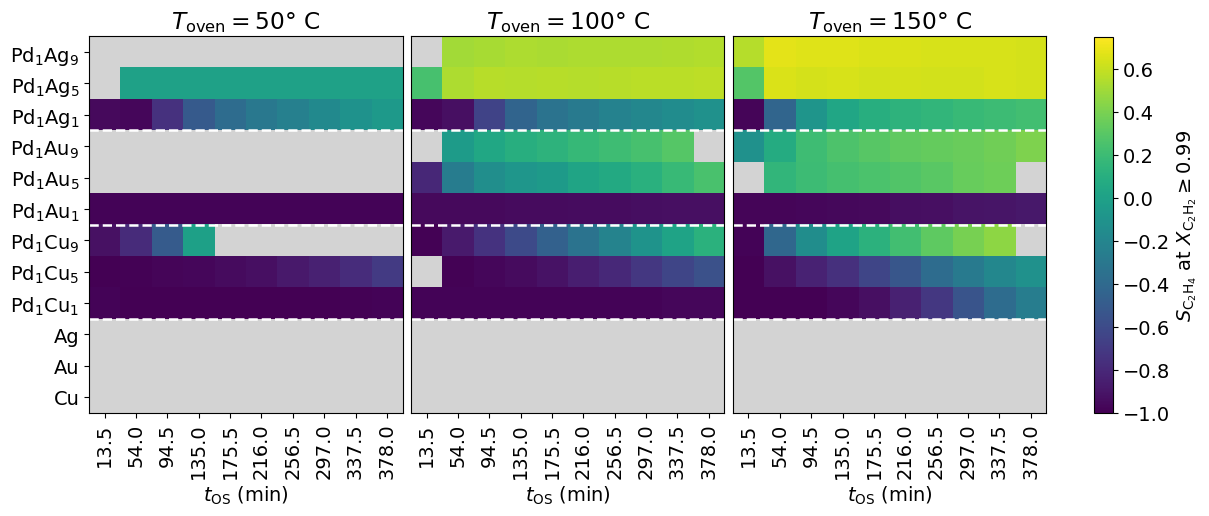

In [8]:
# The acetyelene conversion and ethylene selectivity are plotted in the following figure
# Define catalyst names and captions
catalyst_list = [f'PdAg_1_{i}' for i in [9, 5, 1]] + \
                [f'PdAu_1_{i}' for i in [9, 5, 1]] + \
                [f'PdCu_1_{i}' for i in [9, 5, 1]] + ['Ag', 'Au', 'Cu']

catalyst_list_caption = [r'Pd$_1$Ag$_9$', r'Pd$_1$Ag$_5$', r'Pd$_1$Ag$_1$',
                         r'Pd$_1$Au$_9$', r'Pd$_1$Au$_5$', r'Pd$_1$Au$_1$',
                         r'Pd$_1$Cu$_9$', r'Pd$_1$Cu$_5$', r'Pd$_1$Cu$_1$',
                         'Ag', 'Au', 'Cu']

# Predefine temperatures and storage containers
temperatures = [50, 100, 150]
sel_matrices, act_matrices, masks = {}, {}, {}

# Extract data for each catalyst and temperature
for T in temperatures:
    sel_matrices[T], act_matrices[T] = [], []
    for cat in catalyst_list:
        data = df_initial[df_initial['material_Temperature'] == f"{cat}_{T}"]
        sel = list(data['S_ethylene'].iloc[::3])
        act = list(data['X_acetylene'].iloc[::3])
        sel_matrices[T].append(sel)
        act_matrices[T].append(act)
    
    # Convert to numpy arrays
    sel_np = np.array(sel_matrices[T])
    act_np = np.array(act_matrices[T])
    
    # Mask values where conversion is below 99%
    masks[T] = np.ma.masked_where(act_np <= 0.99, sel_np)

# Plotting 
plt.rcParams.update({'font.size': 14})
fig, axes = plt.subplots(1, 3, figsize=(12, 8), constrained_layout=True)

# Shared colormap
cmap = cm.get_cmap('viridis').copy()
cmap.set_bad(color='lightgrey')

# Shared x-ticks from any dataset
x_ticks = list(df_initial[df_initial['material_Temperature'] == f"{catalyst_list[0]}_{temperatures[0]}"]['time (min)'].iloc[::3])

# Create subplots for each temperature
for i, T in enumerate(temperatures):
    ax = axes[i]
    im = ax.imshow(masks[T], cmap=cmap, vmin=-1, vmax=0.75)

    # Axis labels and ticks
    ax.set_xlabel(r'$t_{\mathrm{OS}}$ (min)')
    ax.set_xticks(range(len(x_ticks)))
    ax.set_xticklabels(x_ticks, rotation=90)

    if i == 0:
        ax.set_yticks(range(len(catalyst_list_caption)))
        ax.set_yticklabels(catalyst_list_caption)
    else:
        ax.set_yticks([])

    # Horizontal lines to separate metal groups
    for y in range(3, masks[T].shape[0], 3):
        ax.axhline(y - 0.5, color='white', linestyle='--', linewidth=1.8)

    ax.set_title(fr'$T_{{\mathrm{{oven}}}}={T} \degree$ C')

# Shared colorbar
fig.colorbar(im, ax=axes, shrink=0.475, label=r'$S_{\mathrm{C_2H_4}}$ at $X_{\mathrm{C_2H_2}} \geq 0.99$')

# Analysis of Candidate Descriptive Parameters (Primary Features)

As candidate descriptive parameters (primary features) characterizing the materials and reaction conditions, we collected four parameters from the experimental characterization of the materials by energy dispersive X-ray analysis in a scanning electron microscope (EDX-SEM), high-resolution transmission-electron microscopy (TEM), and N$_2$ physisorption, such as the mean particle diameter ($D_\mu$) and the specific surface area ($s_{\mathrm{BET}}$).
Additionally, we included three experimental elemental (free-atom) properties and three experimental bulk properties as parameters reflecting the chemistry of the bulk of the metal NPs, such as the ionization potential ($IP$) and the closest interatomic distance ($d_{\mathrm{closest}}$). Finally, we utilized nine parameters reflecting the properties of the surfaces of the metal NPs and the interaction of carbon and hydrogen with the surface and subsurface. These parameters were calculated by density functional theory under the generalized gradient approximation (DFT-GGA) on low-index model surfaces. Examples of such parameters are the energy of the $d$-band center($\epsilon_d$),\cite{Hammer-2000}, and the binding energy of subsurface hydrogen and carbon ($E_{\mathrm{b,H}}^{\mathrm{sub}}$ and $E_{\mathrm{b,C}}^{\mathrm{sub}}$, respectively). The elemental, bulk, and surface-related properties were converted into materials-specific parameters by taking the composition average, indicated by the bar in $\overline{\phi}$, where $\phi$ is an elemental, bulk, or surface parameter. Finally, $t_{\mathrm{OS}}$ and $T_{\mathrm{oven}}$ were used as parameters related to the applied reaction conditions. 
In total, 21 candidate descriptive parameters were collected (see full list in Table S1 as well details on the experimental or theoretical methods used to obtain them).

In [9]:
# We collect the values of the candidate descriptive parameters 
# plot the distribution of their values, and analyze the correlations between them

reaction_parameters=['time (min)','T_reactor (C)']

materials_parameters=['total_metal_loading', 
                      'particle_diameter (nm)',
                      'std_dev (nm)', 
                      'surface_area (m^2/g)',
                      'av_IP (eV)', 
                      'av_EA (eV)', 
                      'av_PE',
                      'av_bulk_int_dist (A)', 
                      'av_E_coh (eV/atom)', 
                      'av_B_0 (Gpa)', 
                      'av_mu_C_critical_surf (eV)',
                      'av_mu_C_critical_subsurf (eV)', 
                      'av_E_b_C_subsurf (eV)', 
                      'av_E_def_subsurf (eV)',
                      'av_delta_M1_M2_subsurf', 
                      'av_BE_H_surf (eV)', 
                      'av_W_change_H (eV)',
                      'av_d_band_center_surf (eV)', 
                      'av_BE_H_subsurf (eV)']

materials_parameters_labels=['$w_{\mathrm{metal}}$' , 
                             '$D_\mu$', 
                             '$D_\sigma$',
                             '$s_{\mathrm{BET}}$', 
                             '$\overline{IP}$', 
                             '$\overline{EA}$', 
                             '$\overline{EN}$',
                             '$\overline{d_{\mathrm{closest}}}$', 
                             '$\overline{E_{\mathrm{coh}}}$', 
                             '$\overline{B_{\mathrm{0}}}$',
                             '$\overline{\mu_{\mathrm{C}}^{\mathrm{surf}}}$',
                             '$\overline{\mu_{\mathrm{C}}^{\mathrm{sub}}}$',
                             '$\overline{E_{\mathrm{b,C}}^{\mathrm{sub}}}$', 
                             '$\overline{E_{\mathrm{d,C}}^{\mathrm{sub}}}$',
                             '$\overline{\delta_{\mathrm{C}}^{\mathrm{sub}}}$', 
                             '$\overline{E_{\mathrm{b,H}}^{\mathrm{surf}}}$', 
                             '$\overline{\Delta W_{\mathrm{H}}^{\mathrm{surf}}}$',
                             '$\overline{\epsilon_d}$',
                             '$\overline{E_{\mathrm{b,H}}^{\mathrm{sub}}}$']

features=reaction_parameters+materials_parameters

df_materials_parameters = df_initial[materials_parameters].copy()

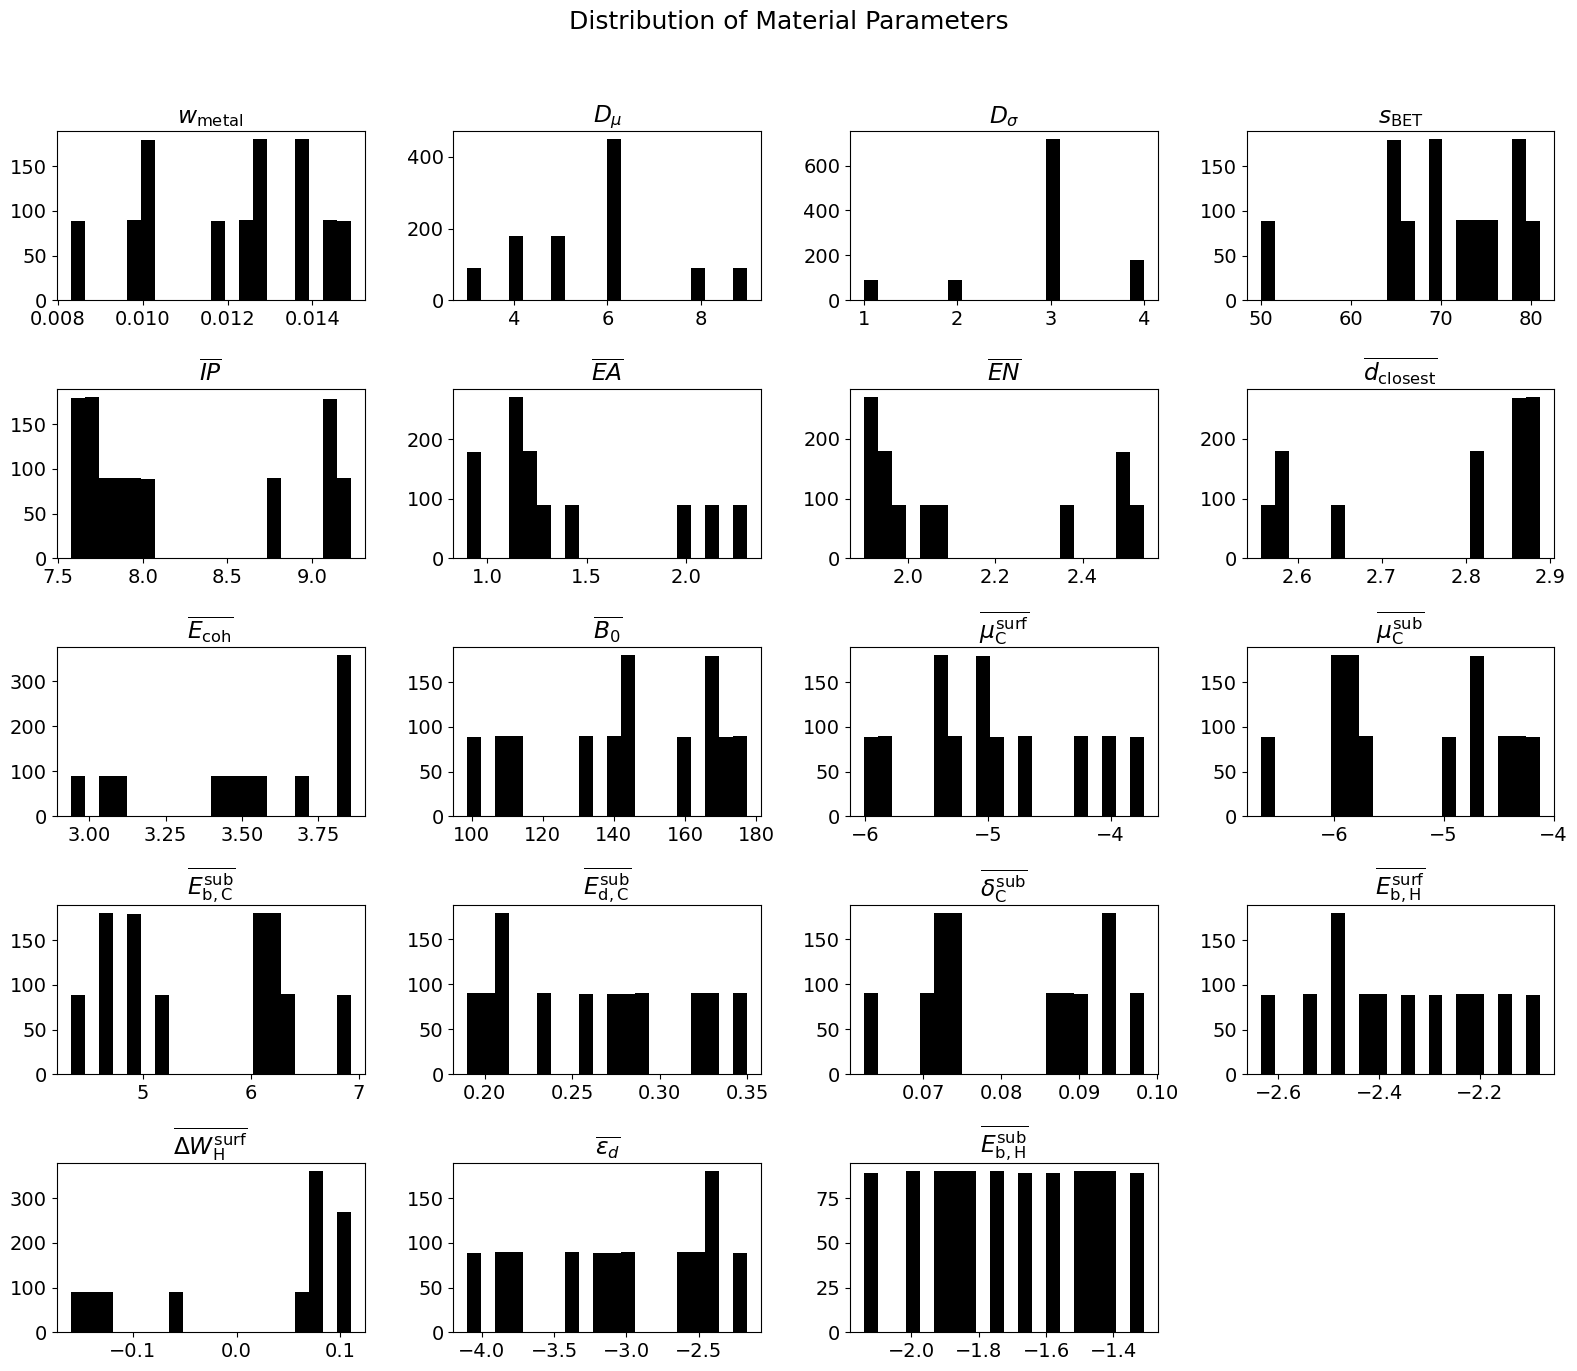

In [10]:
# Create histogram grid
fig, axes = plt.subplots(5, 4, figsize=(16, 14))
axes = axes.flatten()

# Loop over each parameter and its label
for i, (param, label) in enumerate(zip(materials_parameters, materials_parameters_labels)):
    ax = axes[i]
    ax.hist(df_materials_parameters[param], bins=20, color='k')
    ax.set_title(label)
    #ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Hide any unused subplots
for j in range(len(materials_parameters), len(axes)):
    axes[j].axis('off')

# Adjust layout
fig.suptitle('Distribution of Material Parameters', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


<Axes: >

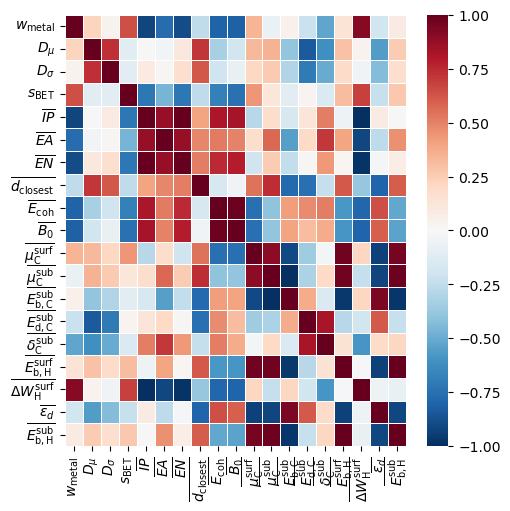

In [11]:
plt.rcParams.update({'font.size': 10})
fig,ax1 = plt.subplots(1,1, constrained_layout=True, figsize=(5,5))


matrix = np.triu(df_materials_parameters)
pearson_correlation = df_materials_parameters.corr(method='pearson')
sns.heatmap(pearson_correlation, 
            xticklabels=materials_parameters_labels,
            yticklabels=materials_parameters_labels,
            cmap='RdBu_r',
            annot=False,
            linewidth=0.5,
            vmin=-1, vmax=1)

# Step 1: SGD Identification of Descriptions of Materials and Reaction Conditions Resulting in Noticeable Acetylene Conversion

In [12]:
# Specify columns to extract (index, target, and features to be used in SGD)
columns_to_extract =['material_Temperature','material_Temperature_time']+performance_targets+features

# Extract the specified columns
df_SGD = df_initial[columns_to_extract].copy().set_index('material_Temperature_time')

# Rename columns by removing the units (in parentheses)
df_SGD.columns = [re.sub(r'\s*\(.*?\)', '', col).strip() for col in df_SGD.columns]

In [13]:
# Function to create input files for SGD
def write_input_SGD(path, df, id_job, n_cutoffs, algo, dev, n_res, n_seeds, target_key, weight):
    """
    creates the two input files necessary to run SGD with realkd:
    i) a .json file with calculation details, named "id_job.json", and
    ii) a .xarf file with the data set, named "id_job.xarf".
    function arguments: path(str): path to the folder where the files 
                                   will be written
               df(data frame): data set containing the values for the 
                               candidate descriptive parameters and for
                               the target for all materials
               id_job(str): job name
               n_cutoffs(int): number of cutoffs to be used in k-Means
                               clustering to generate the propositions
               algo(str): SG search algorithm:
                          PMM_SAMPLER 
                          EMM_SAMPLER
                          EXCEPTIONAL_SUBGROUP_BESTFIRST_BRANCHANDBOUND
                          
                          PMM_SAMPLER uses (std(SG)-std(P))/std(P) as utility function
                          whereas EMM_SAMPLER/EXCEPTIONAL_SUBGROUP_BESTFIRST_BRANCHANDBOUND 
                          use the function specified in dev
               
               dev(str): deviation measure when using EMM_SAMPLER: 
                         cumulative_jensen_shannon_divergence
                         normalized_positive_mean_shift
                         normalized_negative_mean_shift
                         normalized_positive_median_shift
                         normalized_negative_median_shift
                         
               n_res(int): number of results, i.e., number of top-ranked
                           SGs to display
               n_seeds(int): number of seeds to use for the SG search
               target_key(str): label of the variable to be used as target quantity in SGD
    """
    df.to_csv(path+'/'+id_job+'.csv')
    with open(path+'/'+id_job+'.csv', 'r') as file_in:
        data = file_in.read().splitlines(True)
        
    file_out = open(path+'/'+id_job+'.xarf', 'w')
    file_out.write('@relation '+id_job+'\n')
    file_out.write('@attribute materials name\n')
    for variable in list(df.columns):
        file_out.write('@attribute '+variable+' numeric\n')
    file_out.write("@data\n")
    file_out.close()

    with open(path+'/'+id_job+'.xarf', 'a') as file_out:
        file_out.writelines(data[1:])
        file_out.close()
    
    input_file = {}
    input_file = {"type" : "productWorkScheme",
                  "id" : id_job,
                  "workspaces" : [ {
                                "type" : "workspaceFromXarf",
                                "id" : id_job,
                                "datafile" : id_job+".xarf",
                                "propScheme": {"type": "standardPropScheme",
                                                "defaultMetricRule": {"type": "kmeansPropRule",
                                                                       "numberOfCutoffs": n_cutoffs,
                                                                       "maxNumberOfIterations": 1000}}} ],
                    "computations" : [ {
                                "type" : "legacyComputation",
                                "id" : "subgroup_analysis",
                                "algorithm" : algo,
                                "parameters" : {
                                    "dev_measure": dev,
                                    "attr_filter" : "[]",
                                    "cov_weight" : weight,
                                    "num_res" : n_res,
                                    "num_seeds" : n_seeds,
                                    "targets" : "["+target_key+"]"
                                             }
                  }],
                  "computationTimeLimit" : 3600000
                     }
    with open(path+'/'+id_job+'.json','w') as outfile:
        json.dump(input_file, outfile, indent=4)

In [14]:
# Specify a name for the SGD job
job_id='SGD_test_job_name'

# Speficy SGD parameters
# Number of thresholds (k in k-means clustering)
n_clusters=20

#Number of seeds used to initialize the SGD search algorithm (opportunistic pruning)
n_seeds=50000

#Number of SGD solutions to be printed
n_results=5000

#Check if old files exist for the specified job_id and remove them
dirpath = os.path.join('./output/', job_id)
if os.path.exists(dirpath) and os.path.isdir(dirpath):
    shutil.rmtree(dirpath)

# Write input files
# The utility function "standard deviation reduction" is chosen ("PMM_SAMPLER")
write_input_SGD('./', 
            df_SGD.drop(['material_Temperature', 'time', 'S_ethylene', 'S_ethane','S_C4'], axis=1), 
            job_id, 
            n_clusters,
            'PMM_SAMPLER',
            '',
            n_results, 
            n_seeds,
            columns_to_extract[2],
            1.0)
# Run SGD  
os.system('java -jar realkd-0.7.2-jar-with-dependencies.jar '+job_id+'.json')

realKD 0.7.2 (c) 2014-18 by the Contributors of the realKD project


Jun 02, 2025 2:03:22 PM de.unibonn.realkd.common.KdonTypes <clinit>
INFO: Loading KdonTypes
Jun 02, 2025 2:03:22 PM de.unibonn.realkd.common.KdonTypes <clinit>
INFO: Done loading KdonTypes
Jun 02, 2025 2:03:22 PM de.unibonn.realkd.data.xarf.XarfParsing parse
INFO: Parsing input file
Jun 02, 2025 2:03:22 PM de.unibonn.realkd.data.xarf.XarfParsing parse
INFO: Done parsing ARFF file
Jun 02, 2025 2:03:22 PM de.unibonn.realkd.data.table.CSV csvStringListToListOfLists
INFO: Done reading data (1076 number of rows)
Jun 02, 2025 2:03:22 PM de.unibonn.realkd.data.xarf.Xarf attributes
INFO: Done creating attributes (21 attributes created)
Jun 02, 2025 2:03:22 PM de.unibonn.realkd.data.xarf.Xarf derivedAttributes
INFO: Done creating derived attributes (0 derived attributes created)
Jun 02, 2025 2:03:22 PM de.unibonn.realkd.data.propositions.StandardPropositionalizationScheme apply
INFO: Done compiling proposition list (840 propositions added)
Jun 02, 2025 2:03:22 PM de.unibonn.realkd.common.worksp

0

In [15]:
# Function to analyze the results of SGD
def analyze_output_SGD(file_results):
    
    list_coverages=[]
    list_utility_function=[]
    list_quality_function=[]
    list_target_mean=[]
    list_constraints=[]
    
    with open(file_results) as json_file:
        data = json.load(json_file)
        for index in range(len(data)):
            coverage=data[index].get('measurements')[0].get('value')
            utility_function=data[index].get('measurements')[1].get('value')
            quality_function=coverage*utility_function
            target_mean=data[index].get('descriptor').get('targetLocalModel').get('means')
            list_attributes=data[index].get('descriptor').get('selector').get('attributes')
            list_operators=[]
            list_cutoffs=[]
            constraints=[]
            for i in list(range(0,len(list_attributes))):
                list_operators.append(data[index].get('descriptor').get('selector').get('constraints')[i].get('type'))
                list_cutoffs.append(round(data[index].get('descriptor').get('selector').get('constraints')[i].get('value'),4))

            list_operators = [op.replace('lessOrEquals', '<=') for op in list_operators]
            list_operators = [op.replace('greaterOrEquals', '>=') for op in list_operators]
            list_operators = [op.replace('lessThan', '<') for op in list_operators]
            list_operators = [op.replace('greaterThan', '>') for op in list_operators]
    
            for i in list(range(0,len(list_attributes))):
                if i == 0:
                    constraints=list_attributes[0]+list_operators[0]+str(list_cutoffs[0])
                else:
                    constraints=constraints+' & '+list_attributes[i]+list_operators[i]+str(list_cutoffs[i])
            list_coverages.append(coverage)
            list_utility_function.append(utility_function)
            list_quality_function.append(quality_function)
            list_target_mean.append(*target_mean)
            list_constraints.append(constraints)
            
            
    df = pd.DataFrame(list(zip(list_coverages,
                               list_utility_function,
                               list_quality_function,
                              list_target_mean,
                               list_constraints)), 
                      columns =['coverage','utility','quality','target_mean','constraints'])
    return(df)

In [16]:
# To analyze the results obtained in the publication, uncomment the following line
job_id='SGD_results_publication'

# Path to the file with the SGD results
file_results='./output/'+job_id+'/'+os.listdir('./output/'+job_id+'/')[0]+'/results/'+job_id+'_subgroup_analysis.json'

# The results are stored in a dataframe that shows a list of SGs ranked by their quality-function values 
df_SGD_results=analyze_output_SGD(file_results)
df_SGD_results.head(n=10)

,coverage,utility,quality,target_mean,constraints
0,0.500929,0.938991,0.470368,0.997673,T_reactor>=75.0 & av_E_b_C_subsurf>=4.6685 & a...
1,0.500929,0.938991,0.470368,0.997673,T_reactor>=100.0 & av_PE>=1.93 & av_bulk_int_d...
2,0.500929,0.938991,0.470368,0.997673,T_reactor>=100.0 & av_E_b_C_subsurf>=4.677 & a...
3,0.500929,0.938991,0.470368,0.997673,T_reactor>=75.0 & av_E_b_C_subsurf>=4.677 & av...
4,0.500929,0.938991,0.470368,0.997673,T_reactor>=100.0 & av_IP<=9.1371 & av_PE>=1.91...
5,0.500929,0.938991,0.470368,0.997673,T_reactor>=100.0 & av_PE>=1.915 & av_bulk_int_...
6,0.500929,0.938991,0.470368,0.997673,T_reactor>=75.0 & av_B_0>=103.31 & av_bulk_int...
7,0.500929,0.938991,0.470368,0.997673,T_reactor>=75.0 & av_E_def_subsurf<=0.332 & av...
8,0.500929,0.938991,0.470368,0.997673,T_reactor>=100.0 & av_PE>=1.93 & av_mu_C_criti...
9,0.500929,0.938991,0.470368,0.997673,T_reactor>=100.0 & av_IP<=9.1371 & av_IP>=7.61...


In [17]:
# Collect the rules associated to the SG presenting the highest value of quality function
df_SGD_results.iloc[0]['constraints']

'T_reactor>=75.0 & av_E_b_C_subsurf>=4.6685 & av_bulk_int_dist>=2.5659'

Text(0.5, 0, '$S_{\\mathrm{C4}}$')

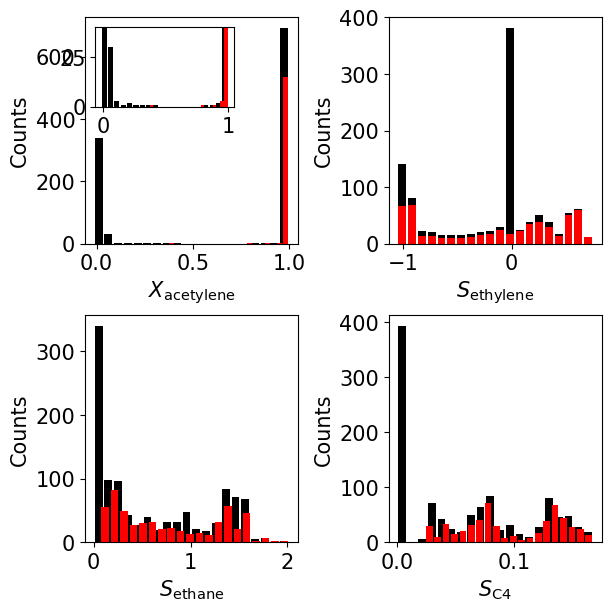

In [18]:
# Plot the distribution of target performance metrics in the entire dataset
# and in the identified SG
plt.rcParams.update({'font.size': 15})
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, constrained_layout=True, figsize=(6,6))

# Apply the SG rules (constraints) to the dataset
df_SGD_selected=df_SGD.query(df_SGD_results['constraints'][0])

color_entire_dataset='black'
color_SG='red'
n_bins=20

ax1.hist(df_initial['X_acetylene'], color=color_entire_dataset, bins=n_bins, rwidth=0.8)
ax1.hist(df_SGD_selected['X_acetylene'], color=color_SG, bins=n_bins, rwidth=0.8)

axins = inset_axes(ax1, width="65%", height="35%",loc=2)
axins.hist(df_initial['X_acetylene'], color=color_entire_dataset, bins=n_bins, rwidth=0.8)
axins.hist(df_SGD_selected['X_acetylene'], color=color_SG, bins=n_bins, rwidth=0.8)
axins.set_ylim(0,40)

ax2.hist(df_initial['S_ethylene'], color=color_entire_dataset, bins=n_bins, rwidth=0.8)
ax2.hist(df_SGD_selected['S_ethylene'], color=color_SG, bins=n_bins, rwidth=0.8)

ax3.hist(df_initial['S_ethane'], color=color_entire_dataset, bins=n_bins, rwidth=0.8)
ax3.hist(df_SGD_selected['S_ethane'], color=color_SG, bins=n_bins, rwidth=0.8)

ax4.hist(df_initial['S_C4'], color=color_entire_dataset, bins=n_bins, rwidth=0.8)
ax4.hist(df_SGD_selected['S_C4'], color=color_SG, bins=n_bins, rwidth=0.8)

ax1.set_ylabel('Counts')
ax2.set_ylabel('Counts')
ax3.set_ylabel('Counts')
ax4.set_ylabel('Counts')

ax1.set_xlabel('$X_{\mathrm{acetylene}}$')
ax2.set_xlabel('$S_{\mathrm{ethylene}}$')
ax3.set_xlabel('$S_{\mathrm{ethane}}$')
ax4.set_xlabel('$S_{\mathrm{C4}}$')

Text(0, 0.5, '$\\widebar{d_{\\mathrm{closest}}}$ ($\\mathrm{\\AA}$)')

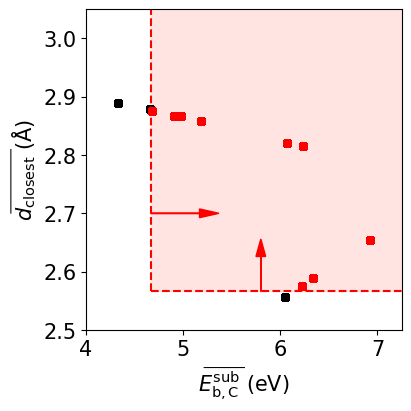

In [19]:
# For the SG identified in the publication,
# we plot the 12 materials in the coordinates of the two materials-related parameters appearing in the rules
fig, (ax1) = plt.subplots(1,1, constrained_layout=True, figsize=(4,4))
marker_size=30
ax1.vlines(4.6685,2.5659,3.05,color='red',linestyle='dashed')
ax1.hlines(2.5659,4.6685,9,color='red',linestyle='dashed')
ax1.fill_between([4.6685,9], 2.5659, 3.05, color='mistyrose')

ax1.scatter(df_SGD['av_E_b_C_subsurf'],df_SGD['av_bulk_int_dist'],c=color_entire_dataset,s=marker_size)
ax1.scatter(df_SGD_selected['av_E_b_C_subsurf'],df_SGD_selected['av_bulk_int_dist'],c=color_SG,s=marker_size)

ax1.set_ylim(2.5,3.05)
ax1.set_xlim(4,7.25)
ax1.arrow(4.6685, 2.7, 0.5, 0, head_width=0.015, head_length=0.2, color=color_SG)
ax1.arrow(5.8, 2.5659, 0, 0.06, head_width=0.10, head_length=0.03, color=color_SG)

ax1.set_xlabel('$\\widebar{E_{\mathrm{b,C}}^{\mathrm{sub}}}$ (eV)')  
ax1.set_ylabel('$\\widebar{d_{\mathrm{closest}}}$ ($\mathrm{\AA}$)') 

# Step 2: Training SISSO Models for Selectivity 

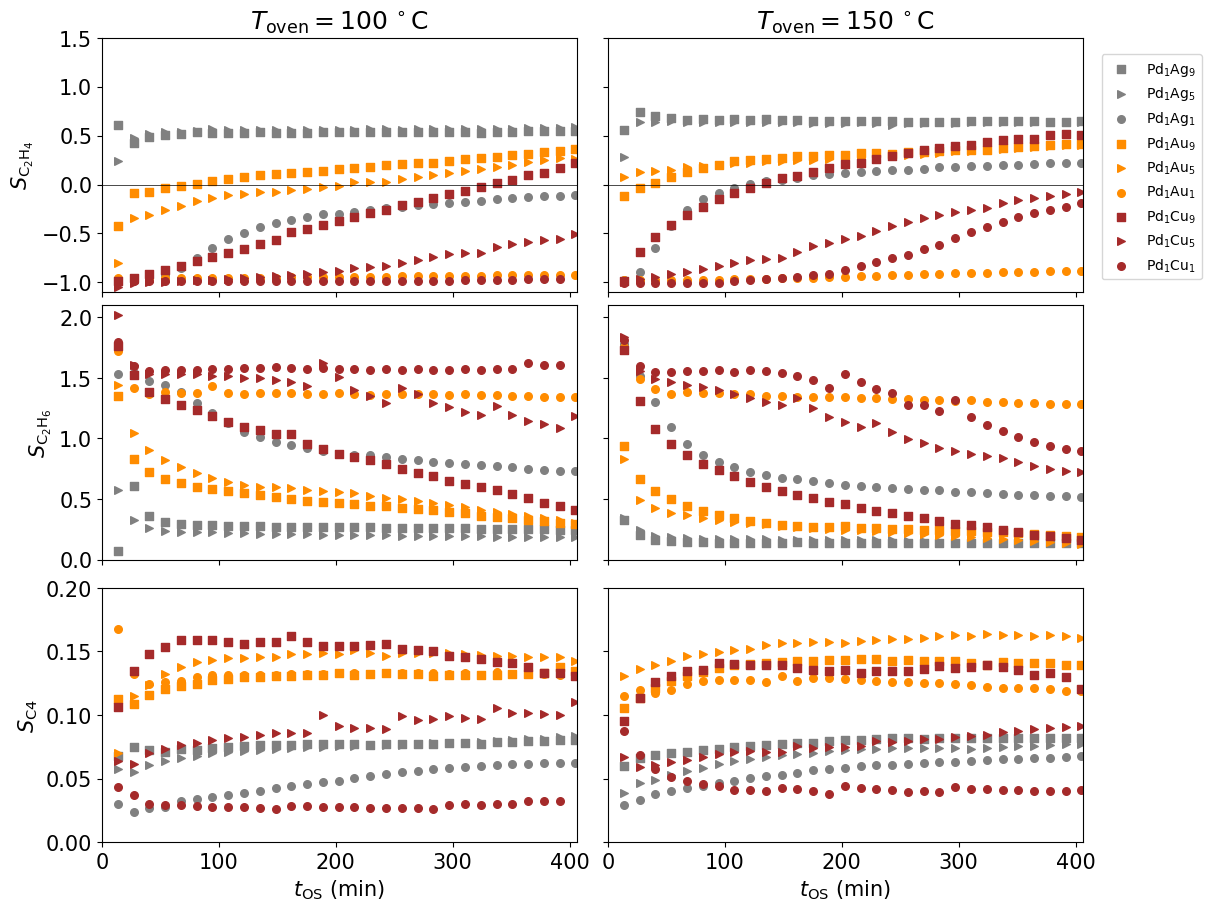

In [20]:
# We first visualize the selectivity values as a function of time on stream for the datapoints selected in the SG

# Configure global plot font size
plt.rcParams.update({'font.size': 15})

# Create grid of subplots (for three products at two temperatures)
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12, 9), constrained_layout=True)

# Define visual properties for catalysts 
colors = ['grey'] * 3 + ['darkorange'] * 3 + ['brown'] * 3
markers = ['s', '>', 'o'] * 3
marker_size = 30

# Loop over each of the 9 catalysts
for i in range(9):    
    # Get time-series data for current catalyst at 100°C and 150°C
    cat_100 = df_SGD_selected.loc[df_SGD_selected['material_Temperature'] == catalyst_list[i] + '_100']
    cat_150 = df_SGD_selected.loc[df_SGD_selected['material_Temperature'] == catalyst_list[i] + '_150']
    
    # Scatter plot for S_ethylene
    ax1.scatter(cat_100['time'], cat_100['S_ethylene'], color=colors[i], s=marker_size, marker=markers[i])
    ax2.scatter(cat_150['time'], cat_150['S_ethylene'], color=colors[i], s=marker_size, marker=markers[i])
    
    # Scatter plot for S_ethane
    ax3.scatter(cat_100['time'], cat_100['S_ethane'], color=colors[i], s=marker_size, marker=markers[i])
    ax4.scatter(cat_150['time'], cat_150['S_ethane'], color=colors[i], s=marker_size, marker=markers[i])
    
    # Scatter plot for S_C4
    ax5.scatter(cat_100['time'], cat_100['S_C4'], color=colors[i], s=marker_size, marker=markers[i])
    ax6.scatter(cat_150['time'], cat_150['S_C4'], color=colors[i], s=marker_size, marker=markers[i])

# Set axes limits
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.set_xlim(0, 406)
ax1.set_ylim(-1.1, 1.5)
ax2.set_ylim(-1.1, 1.5)
ax3.set_ylim(0, 2.1)
ax4.set_ylim(0, 2.1)
ax5.set_ylim(0, 0.2)
ax6.set_ylim(0, 0.2)

# Set axis labels
ax1.set_ylabel('$S_{\mathrm{C_2H_4}}$')
ax3.set_ylabel('$S_{\mathrm{C_2H_6}}$')
ax5.set_ylabel('$S_{\mathrm{C4}}$')
ax5.set_xlabel('$t_{\mathrm{OS}}$ (min)')
ax6.set_xlabel('$t_{\mathrm{OS}}$ (min)')

# Tweak tick labels visibility for cleaner layout
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xticklabels([])
for ax in [ax2, ax4, ax6]:
    ax.set_yticklabels([])

# Add subplot titles for temperature conditions
ax1.set_title('$T_{\mathrm{oven}} = 100\,^\circ\mathrm{C}$')
ax2.set_title('$T_{\mathrm{oven}} = 150\,^\circ\mathrm{C}$')

# Add horizontal reference line at y=0 to the top row
ax1.axhline(0, color='k', linewidth=0.5)
ax2.axhline(0, color='k', linewidth=0.5)

# Add legend for catalysts (only once)
ax2.legend(
    labels=catalyst_list_caption[:9],
    loc=(1.04, 0.05),
    frameon=True,
    ncol=1,
    fontsize=10)

In [21]:
# A dataset with the training data for SISSO is created based on the SG rules identified in the publication
# It contains 539 data points, ca. 50% of the original dataset 
df_SISSO=df_initial.loc[(df_initial['T_reactor (C)'] > 75)
                      & (df_initial['av_bulk_int_dist (A)'] >=2.5659)
                      & (df_initial['av_E_b_C_subsurf (eV)'] >= 4.6685)]
len(df_SISSO)

539

A nested 5-fold strategy is used in order to evaluate the performance of the SISSO models. The outer loop is used to evaluate prediction (or test) errors, whereas the inner loop is used for evaluating the optimal model hyperparameters. In the context of SISSO, two parameters control the model complexity, the rung $q$ and the model dimensionality $D$. The optimal set of hyperparameters is considered the one providing the lowest validation errors. In particular, we use the root mean squared error averaged over the five validation sets as our performance metric. In this work, we consider $q=1,2$ and $D=1,2,3,4,5$. Further details can be found in the Supplemental Material <a href="https://journals.aps.org/prl/supplemental/10.1103/PhysRevLett.129.055301/ESI.pdf" target="_blank">[PDF]</a> of the publication.  

<img style="float: center;" src="data/nested_CV.png" width=650>

The sample indices correspoding to the nested 5-fold procedure are obtained as follows.

In [22]:
kf_out=KFold(n_splits=5, random_state=10, shuffle=True)

indices_train_out=[]
indices_test=[]

for train_index,test_index in kf_out.split(df_SISSO):
    indices_train_out.append(train_index)
    indices_test.append(test_index)

kf_in=KFold(n_splits=5, random_state=10, shuffle=True)

indices_train_in=[]
indices_validation=[]

for train_index,test_index in kf_in.split(df_SISSO.iloc[indices_train_out[0],:]):
    indices_train_in.append(train_index)
    indices_validation.append(test_index)

In [23]:
# Function to create input files for SISSO
def write_input_SISSO(train,rung,dim,n_sis,n_res,ops,leave_out_ind,path,calculation_type):
    """Creates the directory and writes the input files (sisso.json and train.dat) for SISSO++
    
    Args:
        train (pd.DataFrame): dataframe containing the data set
        rung (int): number of iterations for operator application (e.g. 1, 2 or 3)
        dim (int): descriptor dimension
        n_sis (int): size of the SIS-selected feature spaces
        n_res (int): number of residuals
        ops (list): list of mathematical operators (str)
        leave_out_ind (list): index of the materials to be left out from training, i.e., test materials
        path (str): path of the directory to be created 
        calculation_type (str): type of calculation (e.g., regression or log_regression)
    """
    rung_store = max(0, rung - 1)
    rung_gen = 0 if rung < 3 else 1
        
    os.mkdir(path)
    train.to_csv(f"{path}/train.dat")
    prop_key=train.columns.values[0].split()[0]
    input_file = {
        'desc_dim':dim,
        'n_sis_select':n_sis,
        'max_rung':rung,
        'n_rung_store':rung_store,
        'n_residual':n_res,
        'min_abs_feat_val': 1e-6,
        'max_abs_feat_val': 1e6,
        'data_file': 'train.dat',
        'property_key': prop_key,
        'n_rung_generate': rung_gen,
        'leave_out_inds': leave_out_ind,
        'n_models_store': 10,
        'opset': ops, 
        "param_opset": [
        "exp",
        "log"], 
        'global_param_opt': 'True',
        'calc_type': calculation_type,
    }
    with open(f"{path}/sisso.json",'w') as outfile:
        json.dump(input_file, outfile, indent=4)

In [24]:
# Speficy SISSO parameters

# Set of operators utilized to create the analytical expressions
operator_set = ["add", 
                "sub", 
                "abs_diff", 
                "mult", 
                "div", 
                "inv", 
                "exp", 
                "sq", 
                "cb", 
                "sqrt", 
                "cbrt", 
                "log", 
                "abs", 
                "six_pow",
                "neg_exp"] 

# Number of residuals
n_res=5

#Number of model dimensions
dimension=5

#Size of subspaces of features selected by SIS
n_sis=50

In [26]:
# We create directories and write SISSO input files associated to the nested cross-validation scheme
# We also train SISSO models utilizing the entire dataset of 539 data points 

os.mkdir('./output/full_dataset')
for fold in [0,1,2,3,4]:
    os.mkdir('./output/fold_'+str(fold))
        
for target in performance_targets[1:]:
    for rung in [1,2]:
        df_SISSO_outer_loop=df_SISSO[['material_Temperature']+[target]+['task']+features].copy().set_index('material_Temperature')
        write_input_SISSO(df_SISSO_outer_loop,
                        rung, dimension, n_sis, n_res, operator_set,
                        '[]',
                        './output/full_dataset/'+target+'_r'+str(rung),
                       'regression')
        for fold in [0,1,2,3,4]:
            write_input_SISSO(df_SISSO_outer_loop,
                        rung, dimension, n_sis, n_res, operator_set,
                        indices_test[fold].tolist(),
                        './output/fold_'+str(fold)+'/'+target+'_r'+str(rung),
                       'regression')
            
            os.mkdir('./output/fold_'+str(fold)+'/'+target+'_r'+str(rung)+'_cv')
            for it in [0,1,2,3,4]:
                    write_input_SISSO(df_SISSO_outer_loop.iloc[indices_train_out[fold],:],
                                rung, dimension, n_sis, n_res, operator_set,
                                 indices_validation[it].tolist(),
                                 './output/fold_'+str(fold)+'/'+target+'_r'+str(rung)+'_cv/iter_'+str(it),
                                'regression')     

In [27]:
# Function to obtain the validation errors of SISSO models
def get_rmse_vs_dim(path,path_cv,n_iter,dim,unit_length):
    """
    reads SISSO++ output (sisso.out) and returns train and validation errors as a function of descriptor dimension
    arguments: path(str): directory containing the output files obtained with the outer-loop data set splits
               path_cv(str): directory containing the output files obtained with the inner-loop data set splits (cross-validation)
               n_iter(int): number of CV iterations
               dim(int): descriptor max dimension
               unit_length(int): lenght of the property unit
    """
    train_errors=[]
    cv_errors=[]
    avg_cv_errors=[]
    std_cv_errors=[]
    with open(path+'/sisso.out') as f:
        data = f.readlines()
        i = 0
        for line in data:
            if line.__contains__('Train'):
                train_rmse =float(line.split()[2].split(';')[0])
                train_errors.append(train_rmse)
                i += 1
    
    for it in [*range(n_iter)]:
        with open(path_cv+'/iter_'+str(it)+'/sisso.out') as f:
            data = f.readlines()
            i = 0
            for line in data:
                if line.__contains__('Train'):
                    test_rmse = float(line.split()[6+(unit_length-1)])
                    cv_errors.append([i, test_rmse])
                    i += 1
    for d in [*range(dim)]:
        a=[]
        for k in [*range(len(cv_errors))]:
            if cv_errors[k][0] == d:
                a.append(cv_errors[k][1])
        avg_cv_errors.append(np.average(a))
        std_cv_errors.append(np.std(a))
                
    return(train_errors, avg_cv_errors, std_cv_errors) 

# Function to obtain the predictions of SISSO models on the test sets
def get_test_data(path,n_iter,rung,dim,prop):
    """
    """
    test_data=pd.DataFrame()
    for it in [*range(n_iter)]:
        d=pd.read_csv(path+'fold_'+str(it)+'/'+str(prop)+'_r'+str(rung)+'/models/test_dim_'+str(dim)+'_model_0.dat', comment='#', header=None)
        test_data=pd.concat([test_data,d])
    return(test_data) 


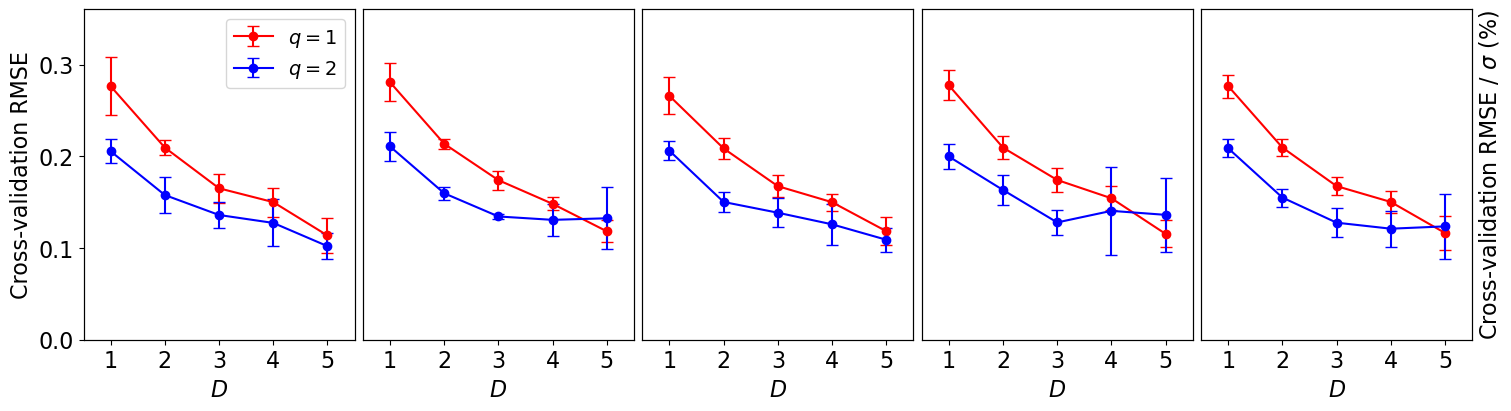

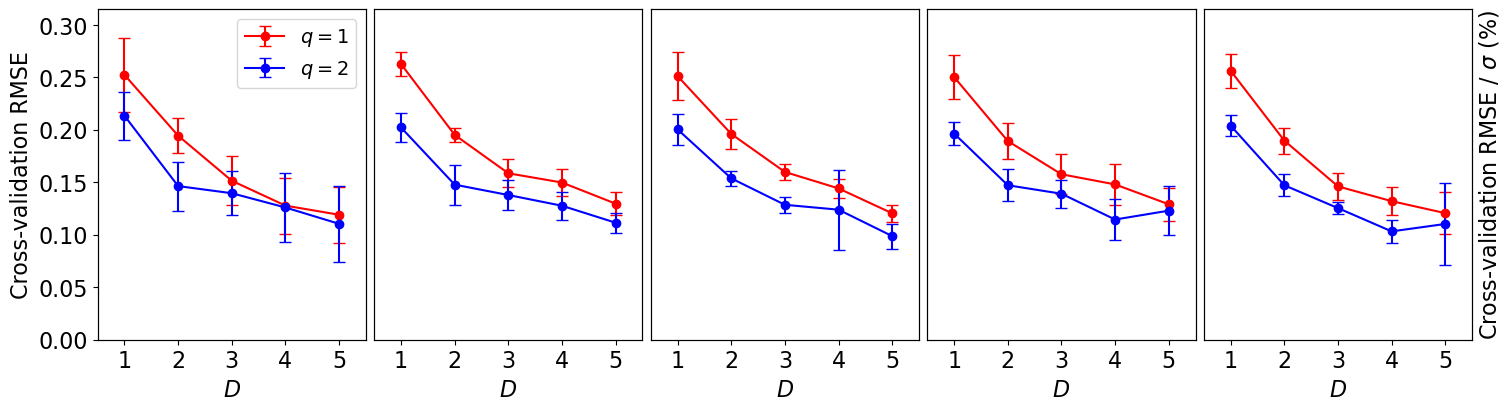

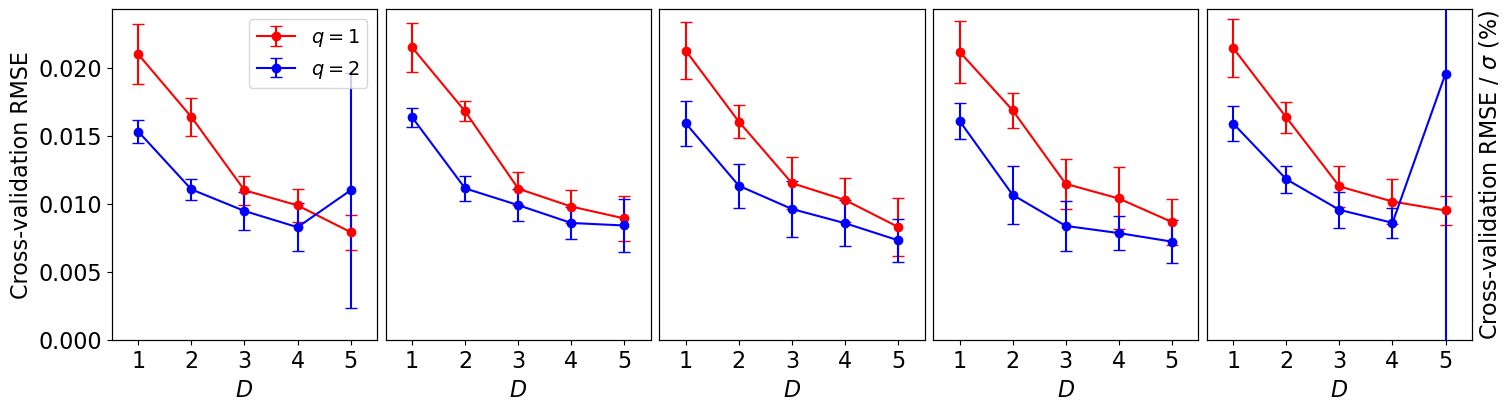

In [28]:
# Visualize the validation errors utilizing the output files provided in ./output/SISSO_results_publication

# Set default font size for plots
plt.rcParams.update({'font.size': 16})

# X-axis values and style definitions
x = [1, 2, 3, 4, 5]
colors = ['', 'red', 'blue']  # rung 1: red, rung 2: blue
labels = ['', '$q=1$', '$q=2$']

# Loop through each performance target
for target in performance_targets[1:]:
    # Define y-axis upper limit as a fraction of the target's std deviation
    std_of_target = np.std(df_SISSO[target]) * 0.6

    # Create 1 row x 5 columns subplot grid, one per data fold
    fig, axes = plt.subplots(1, 5, figsize=(15, 4), constrained_layout=True)

    for fold, ax in enumerate(axes):
        # Plot results for each rung (model complexity level)
        for rung in [1, 2]:
            # Build file path and load RMSE values
            path = f'./output/SISSO_results_publication/fold_{fold}/{target}_r{rung}'
            errors = get_rmse_vs_dim(path, path + '_cv', 5, 5, 1)

            # Plot with error bars
            ax.errorbar(x, errors[1], yerr=errors[2],
                        color=colors[rung],
                        marker='o',
                        mfc=colors[rung],
                        capsize=4,
                        label=labels[rung])

        # Formatting
        ax.set_xlim(0.5, 5.5)
        ax.set_xticks([1, 2, 3, 4, 5])
        ax.set_xlabel('$D$')  # D = descriptor dimension

        # Y-axis settings
        ax.set_ylim(0, std_of_target)
        if fold == 0:
            ax.set_ylabel('Cross-validation RMSE')
        else:
            ax.set_yticks([])  # Remove y-ticks from all but the first plot

        # Add second Y-axis
        ax_twin = ax.twinx()
        ax_twin.set_ylim(0, 60)
        ax_twin.set_yticks([])
        if fold == 4:
            ax_twin.set_ylabel('Cross-validation RMSE / $\sigma$ (%)')

        # Add legend only in the first plot
        if fold == 0:
            ax.legend(loc='upper right', frameon=True, fontsize=14)

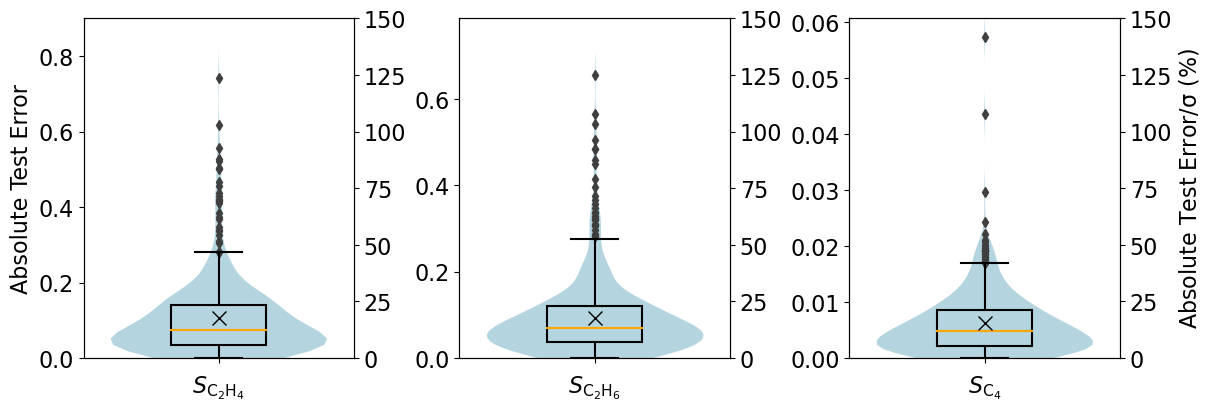

In [29]:
# Visualize the test errors utilizing the output files provided in ./output/SISSO_results_publication

# Plot style settings
plt.rcParams.update({'font.size': 16})

# Optimal rung and descriptor dimension for each target, as identified based on the validation errors (above)
optimal_rungs = [2, 2, 2]
optimal_dimensions = [3, 3, 3]

# Plot customization for boxplots and violin plots
colors = ['lightblue']
boxprops = {"zorder": 100, "linewidth": 1.5, "edgecolor": "k", "facecolor": "none"}
whiskerprops = {"zorder": 100, "color": "k", "linewidth": 1.5}
capprops = {"zorder": 100, "color": "k", "linewidth": 1.5}
medianprops = {"linewidth": 1.5, "color": "orange", "zorder": 200}
meanprops = {
    "marker": "x", "markersize": 10.0,
    "markerfacecolor": "k", "markeredgecolor": "k",
    "zorder": 500
}

# Descriptor labels for each subplot
xlabels = ['$S_{\mathrm{C_2H_4}}$', '$S_{\mathrm{C_2H_6}}$', '$S_{\mathrm{C_4}}$']

# Create a single-row, 3-column plot layout
fig, axes = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)

# Loop over the three properties to generate subplots
for i, ax in enumerate(axes):
    # Get standard deviation of the target variable (for error normalization)
    target = performance_targets[i + 1]
    std_of_target = np.std(df_SISSO[target])

    # Get prediction error data for the optimal model settings
    test_data = get_test_data('./output/SISSO_results_publication/', 5, optimal_rungs[i], optimal_dimensions[i], target)
    test_data["error"] = abs(test_data[1] - test_data[2])
    test_data["type"] = 1  # Constant x-category

    # Violin plot
    sns.violinplot(
        data=test_data, x="type", y="error",
        inner=None, scale="area", palette=colors,
        alpha=1.0, linewidth=0.0, zorder=-2, ax=ax
    )

    # Boxplot
    sns.boxplot(
        data=test_data, x="type", y="error",
        showfliers=True, showmeans=True,
        boxprops=boxprops, whiskerprops=whiskerprops,
        capprops=capprops, medianprops=medianprops,
        meanprops=meanprops, width=0.35, whis=(0.0, 95), ax=ax
    )

    # Axes formatting
    ax.set_xticklabels([''], va='top', fontsize=16)
    ax.set_ylim(0, std_of_target * 1.5)
    ax.set_xlabel(xlabels[i])
    if i == 0:
        ax.set_ylabel('Absolute Test Error')
    else:
        ax.set_ylabel('')

    # Secondary y-axis for percent-normalized view
    ax_twin = ax.twinx()
    ax_twin.set_ylim(0, 150)
    if i == 2:
        ax_twin.set_ylabel('Absolute Test Error/$\mathrm{\sigma}$ (%)')

Text(0, 0.5, 'Absolute Test Error')

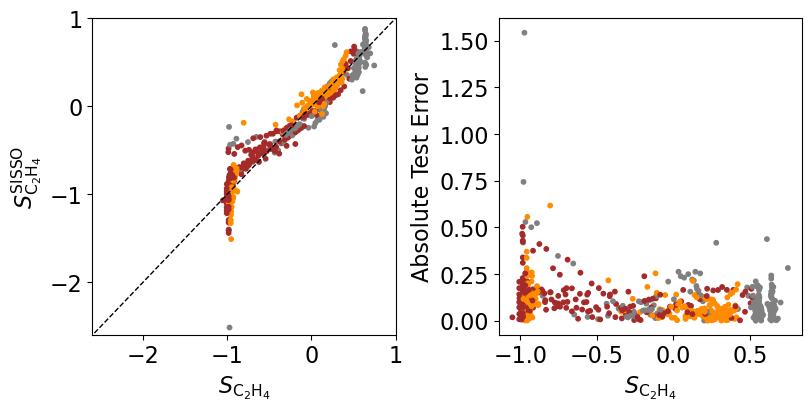

In [30]:
# We visualize the errors for different materials and selectivity values, in the case of ethylene selectivity target

# Load test data for ethylene selectivity prediction
test_data = get_test_data('./output/SISSO_results_publication/', 5, 2, 3, 'S_ethylene')

# Compute test errors
test_data["abserror"] = abs(test_data[1] - test_data[2])     # Absolute error
test_data["error"] = test_data[2] - test_data[1]             # Signed error

# Extract catalyst identity for color coding
test_data["labels"] = test_data[0].str[:4]                   # First 4 characters e.g., 'PdAg'

# Define color map and assign colors based on catalyst type
color_map = {'PdAg': 'grey', 'PdAu': 'darkorange', 'PdCu': 'brown'}
colors = test_data["labels"].map(color_map)

# Create side-by-side scatter plots ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)
marker_size = 10

# Plot 1: SISSO prediction vs true value (Parity plot)
ax1.scatter(test_data[1], test_data[2], c=colors, s=marker_size)
ax1.plot([-3, 2], [-3, 2], color='k', linestyle='--', linewidth=1)  # Diagonal reference line
ax1.set_xlabel('$S_{\mathrm{C_2H_4}}$')                             # True value
ax1.set_ylabel('$S_{\mathrm{C_2H_4}}^{\mathrm{SISSO}}$')            # Predicted value
ax1.set_xlim(-2.6, 1)
ax1.set_ylim(-2.6, 1)

# Plot 2: Absolute error vs true value
ax2.scatter(test_data[1], test_data["abserror"], c=colors, s=marker_size)
ax2.set_xlabel('$S_{\mathrm{C_2H_4}}$')
ax2.set_ylabel('Absolute Test Error')

In [31]:
# Visualization of model fit to the data 
# We look at the models trained on the entire dataset 
# at the optimal complexity identified by cross-validation
targets=performance_targets[1:]
for i in [0,1,2]:
    df_fit=pd.read_csv('./output/SISSO_results_publication/full_dataset/'+targets[i]+'_r'+str(optimal_rungs[i])+'/models/train_dim_'+str(optimal_dimensions[i])+'_model_0.dat',
                        comment='#',
                        names=['material_Temperature_time',
                            'target_true','target_fit',
                            'feature_0','feature_1','feature_2']).set_index('material_Temperature_time')
    df_SGD_selected[targets[i]+'_SISSO']=df_fit['target_fit']

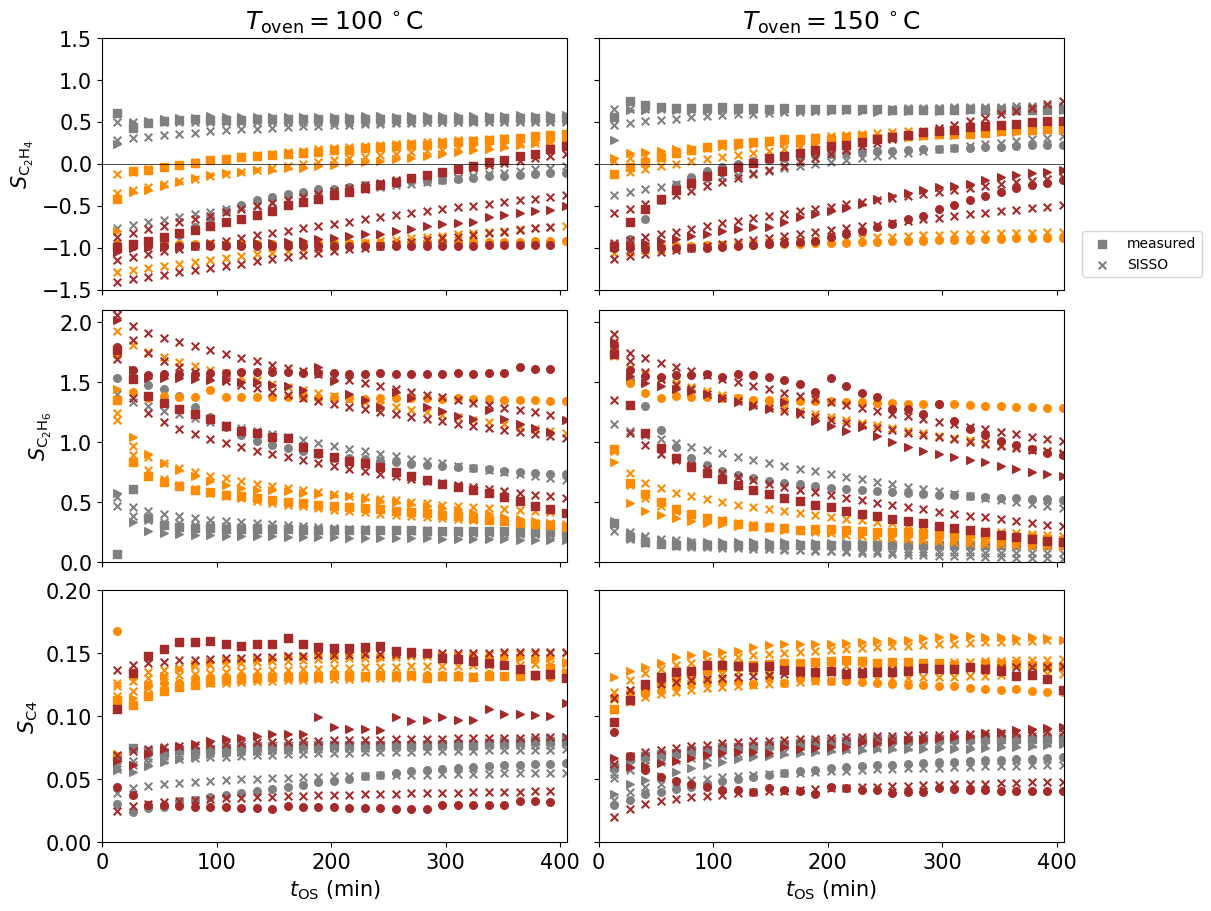

In [32]:
# Configure global plot font size
plt.rcParams.update({'font.size': 15})

# Create 3x2 grid of subplots (for three products at two temperatures)
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12, 9), constrained_layout=True)

# Define visual properties for catalysts
colors = ['grey'] * 3 + ['darkorange'] * 3 + ['brown'] * 3
markers = ['s', '>', 'o'] * 3
marker_size = 30

# Loop over each of the 9 catalysts
for i in range(9):    
    # Get time-series data for current catalyst at 100°C and 150°C
    cat_100 = df_SGD_selected.loc[df_SGD_selected['material_Temperature'] == catalyst_list[i] + '_100']
    cat_150 = df_SGD_selected.loc[df_SGD_selected['material_Temperature'] == catalyst_list[i] + '_150']
    
    # Scatter plot for S_ethylene
    ax1.scatter(cat_100['time'], cat_100['S_ethylene'], color=colors[i], s=marker_size, marker=markers[i])
    ax1.scatter(cat_100['time'], cat_100['S_ethylene_SISSO'], color=colors[i], s=marker_size, marker='x')
    ax2.scatter(cat_150['time'], cat_150['S_ethylene'], color=colors[i], s=marker_size, marker=markers[i])
    ax2.scatter(cat_150['time'], cat_150['S_ethylene_SISSO'], color=colors[i], s=marker_size, marker='x')
    
    # Scatter plot for S_ethane
    ax3.scatter(cat_100['time'], cat_100['S_ethane'], color=colors[i], s=marker_size, marker=markers[i])
    ax3.scatter(cat_100['time'], cat_100['S_ethane_SISSO'], color=colors[i], s=marker_size, marker='x')
    ax4.scatter(cat_150['time'], cat_150['S_ethane'], color=colors[i], s=marker_size, marker=markers[i])
    ax4.scatter(cat_150['time'], cat_150['S_ethane_SISSO'], color=colors[i], s=marker_size, marker='x')
    
    # Scatter plot for S_C4
    ax5.scatter(cat_100['time'], cat_100['S_C4'], color=colors[i], s=marker_size, marker=markers[i])
    ax5.scatter(cat_100['time'], cat_100['S_C4_SISSO'], color=colors[i], s=marker_size, marker='x')
    ax6.scatter(cat_150['time'], cat_150['S_C4'], color=colors[i], s=marker_size, marker=markers[i])
    ax6.scatter(cat_150['time'], cat_150['S_C4_SISSO'], color=colors[i], s=marker_size, marker='x')

# Set axes limits
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.set_xlim(0, 406)
ax1.set_ylim(-1.5, 1.5)
ax2.set_ylim(-1.5, 1.5)
ax3.set_ylim(0, 2.1)
ax4.set_ylim(0, 2.1)
ax5.set_ylim(0, 0.2)
ax6.set_ylim(0, 0.2)

# Set axis labels
ax1.set_ylabel('$S_{\mathrm{C_2H_4}}$')
ax3.set_ylabel('$S_{\mathrm{C_2H_6}}$')
ax5.set_ylabel('$S_{\mathrm{C4}}$')
ax5.set_xlabel('$t_{\mathrm{OS}}$ (min)')
ax6.set_xlabel('$t_{\mathrm{OS}}$ (min)')

# Tweak tick labels visibility for cleaner layout
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xticklabels([])
for ax in [ax2, ax4, ax6]:
    ax.set_yticklabels([])

# Add subplot titles for temperature conditions
ax1.set_title('$T_{\mathrm{oven}} = 100\,^\circ\mathrm{C}$')
ax2.set_title('$T_{\mathrm{oven}} = 150\,^\circ\mathrm{C}$')

# Add horizontal reference line at y=0 to the top row
ax1.axhline(0, color='k', linewidth=0.5)
ax2.axhline(0, color='k', linewidth=0.5)

# Add legend for catalysts (only once)
ax2.legend(
    labels=['measured', 'SISSO'],
    loc=(1.04, 0.05),
    frameon=True,
    ncol=1,
    fontsize=10)

In [33]:
# Extract the model expressions
# We look at the models trained on the entire dataset 
# at the optimal complexity identified by cross-validation

for i in [0,1,2]:
    print('\n SISSO Model for ', targets[i])
    with open('./output/SISSO_results_publication/full_dataset/'+targets[i]+'_r'+str(optimal_rungs[i])+'/models/train_dim_'+str(optimal_dimensions[i])+'_model_0.dat', 'r') as file:
         for j, line in enumerate(file, start=1):
            if j in [1,4,5,6,7]:
                print(line, end='')
            if j >= 7:
                break


 SISSO Model for  S_ethylene
# c0 + a0 * ((time / av_W_change_H) / (|av_d_band_center_surf - av_BE_H_surf|)) + a1 * ((av_E_def_subsurf * total_metal_loading) * particle_diameter) + a2 * (exp(8.365003e-04*((time+3.592461e+02) / (av_BE_H_subsurf+1.384560e+00))))
# Coefficients
# Task   a0                      a1                      a2                      c0
# 2   ,  4.813130462568657e-07,  3.727722063287428e+01, -2.850231650770238e+00, -8.362104387720386e-02, 
# 3   ,  1.263789736634742e-06,  5.269016813835863e+01, -2.661969356874947e+00, -1.704277305893994e-01, 

 SISSO Model for  S_ethane
# c0 + a0 * ((surface_area / time) * (av_delta_M1_M2_subsurf^6)) + a1 * ((std_dev + particle_diameter) * (av_E_def_subsurf / av_PE)) + a2 * (exp(1.266464e-03*((time+6.777928e+02) / (av_BE_H_subsurf+1.225554e+00))))
# Coefficients
# Task   a0                      a1                      a2                      c0
# 2   ,  2.008091279772918e+05, -7.582033893001223e-01,  4.529710264092960e+00,  9.6097

In [34]:
# Extract the model expressions of the top-50 ranked models for ethylene selectivity
for i in range(50):
    print('\n Top '+str(i)+' SISSO Model for ', targets[0])
    with open('./output/SISSO_results_publication/full_dataset/'+targets[0]+'_r'+str(optimal_rungs[0])+'_50_output_models/models/train_dim_'+str(optimal_dimensions[0])+'_model_'+str(i)+'.dat', 'r') as file:
         for j, line in enumerate(file, start=1):
            if j in [1,3,4,5,6,7]:
                print(line, end='')
            if j >= 7:
                break


 Top 0 SISSO Model for  S_ethylene
# c0 + a0 * ((time / av_W_change_H) / (|av_d_band_center_surf - av_BE_H_surf|)) + a1 * ((particle_diameter * total_metal_loading) * av_E_def_subsurf) + a2 * (exp(8.420768e-04*((time+3.656118e+02) / (av_BE_H_subsurf+1.381328e+00))))
# RMSE: 0.113408866516186; Max AE: 0.609221725730477
# Coefficients
# Task   a0                      a1                      a2                      c0
# 2   ,  4.783402969023088e-07,  3.722823267418289e+01, -2.879578734918107e+00, -8.221733176448576e-02, 
# 3   ,  1.260927238118856e-06,  5.264876407252410e+01, -2.690209587739462e+00, -1.689565869272968e-01, 

 Top 1 SISSO Model for  S_ethylene
# c0 + a0 * ((time / av_W_change_H) / (|av_d_band_center_surf - av_BE_H_surf|)) + a1 * ((av_bulk_int_dist / av_E_def_subsurf) / (particle_diameter * total_metal_loading)) + a2 * (exp(8.420768e-04*((time+3.656118e+02) / (av_BE_H_subsurf+1.381328e+00))))
# RMSE: 0.1140260931867; Max AE: 0.554069738575686
# Coefficients
# Task   a0    

# Step 3: Exploiting the SGD and SISSO Models to Design New Materials

In [35]:
# Load dataset of elemental properties 
df_elemental=pd.read_csv('./data/elemental_properties.csv').set_index('element')
df_elemental

,crystal_structure,surface,IP,EA,PE,bulk_int_dist,E_coh,B_0,mu_C_critical_surf,mu_C_critical_subsurf,E_b_C_subsurf,E_def_subsurf,delta_M1_M2_subsurf,BE_H_surf,W_change_H,d_band_center_surf,BE_H_subsurf
element,,,,,,,,,,,,,,,,,
Fe,bcc,(110),7.902,0.153,1.83,2.460,4.28,163.0,-7.77,-7.50,8.27,0.77,8.57,-2.99,-0.04,-0.90,-2.01
Co,hcp,(0001),7.881,0.662,1.88,2.497,4.43,186.0,-6.63,-6.93,7.50,0.57,8.10,-2.89,-0.04,-1.48,-2.09
Ni,fcc,(111),7.640,1.157,1.91,2.493,4.44,179.0,-6.83,-7.57,8.08,0.51,8.43,-2.89,0.02,-1.56,-2.19
Cu,fcc,(111),7.726,1.236,1.90,2.556,3.48,133.0,-5.07,-5.70,6.05,0.35,9.34,-2.39,0.08,-2.52,-1.75
Ru,hcp,(0001),7.459,1.143,2.28,2.650,6.74,303.0,-6.94,-6.29,7.25,0.96,6.30,-2.97,0.03,-1.89,-2.04
Rh,fcc,(111),7.459,1.143,2.28,2.539,5.72,282.0,-7.09,-7.15,7.78,0.63,7.72,-2.81,0.01,-2.02,-2.05
Pd,fcc,(111),8.337,0.562,2.20,2.753,3.90,189.0,-6.95,-7.63,7.80,0.17,5.00,-2.88,0.04,-1.81,-2.53
Ag,fcc,(111),7.576,1.304,1.93,2.889,2.94,98.8,-3.73,-4.12,4.33,0.21,7.48,-2.08,0.11,-4.10,-1.31
Pt,fcc,(111),8.959,2.125,2.28,2.772,5.85,277.0,-7.07,-6.67,7.19,0.52,8.87,-2.72,-0.06,-2.52,-2.04


In [36]:
# Create candidate descriptive parameters (primary features) for hypothetical materials
# obtained with new elements mixed with palladium at different stoichiometries

elements=df_elemental.index.tolist()
elements.remove('Pd')

# Chosen range of stoichiometries
x_element=np.linspace(0.1, 0.9, 9).tolist()

elemental_features=['IP', 
                    'EA', 
                    'PE',
                    'bulk_int_dist', 
                    'E_coh', 
                    'B_0', 
                    'mu_C_critical_surf',
                    'mu_C_critical_subsurf', 
                    'E_b_C_subsurf', 
                    'E_def_subsurf',
                    'delta_M1_M2_subsurf', 
                    'BE_H_surf', 
                    'W_change_H',
                    'd_band_center_surf', 
                    'BE_H_subsurf']

rows = []

for element in elements:
    for x in x_element:
        x_str = f"{x:.1f}" 
        x_comp_str = f"{(1-x):.1f}"
        row={}
        row['material']='Pd'+x_comp_str+element+x_str
        for parameter in elemental_features:
            feature_value=df_elemental.at[element, parameter]*x+df_elemental.at['Pd', parameter]*(1-x)
            row['av_'+parameter]=feature_value
        rows.append(row)
           
df_new_bimetallic = pd.DataFrame(rows).set_index('material')

Text(0, 0.5, '$\\widebar{d_{\\mathrm{closest}}}$ ($\\mathrm{\\AA}$)')

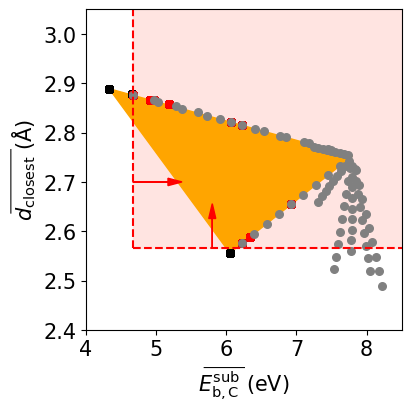

In [37]:
# Visuzalize the hypothetical materials in the coordinates of the key materials-parameters identified by SGD
# The SG rules are also shown

fig, (ax1) = plt.subplots(1,1, constrained_layout=True, figsize=(4,4))
marker_size=30
ax1.vlines(4.6685,2.5659,3.05,color='red',linestyle='dashed')
ax1.hlines(2.5659,4.6685,9,color='red',linestyle='dashed')
ax1.fill_between([4.6685,9], 2.5659, 3.05, color='mistyrose')
ax1.fill([7.8,6.05,4.33], [2.753,2.556,2.889], color='orange',  edgecolor='orange')

ax1.scatter(df_SGD['av_E_b_C_subsurf'],df_SGD['av_bulk_int_dist'],c=color_entire_dataset,s=marker_size)
ax1.scatter(df_SGD_selected['av_E_b_C_subsurf'],df_SGD_selected['av_bulk_int_dist'],c=color_SG,s=marker_size)
ax1.scatter(df_new_bimetallic['av_E_b_C_subsurf'],df_new_bimetallic['av_bulk_int_dist'],c='grey',s=marker_size)

ax1.set_ylim(2.4,3.05)
ax1.set_xlim(4,8.5)
ax1.arrow(4.6685, 2.7, 0.5, 0, head_width=0.015, head_length=0.2, color=color_SG)
ax1.arrow(5.8, 2.5659, 0, 0.06, head_width=0.10, head_length=0.03, color=color_SG)

ax1.set_xlabel('$\\widebar{E_{\mathrm{b,C}}^{\mathrm{sub}}}$ (eV)')  
ax1.set_ylabel('$\\widebar{d_{\mathrm{closest}}}$ ($\mathrm{\AA}$)') 

In [38]:
# Function to evaluate the SISSO model for ethylene selectivity
def evaluate_SISSO_model_ethylene_selectivity(av_W_change_H,
                                              av_d_band_center_surf,
                                              av_BE_H_surf, 
                                              av_E_def_subsurf, 
                                              total_metal_loading, 
                                              particle_diameter,
                                              av_BE_H_subsurf,
                                              time, 
                                              temperature):
    
    if temperature == 150:
        a=[4.813130462568657e-07, 3.727722063287428e+01,  -2.850231650770238e+00, -8.362104387720386e-02]
    if temperature == 100:
        a=[1.263789736634742e-06, 5.269016813835863e+01,  -2.661969356874947e+00, -1.704277305893994e-01]
    
    term_1=a[0]*(time / av_W_change_H) / (np.abs(av_d_band_center_surf - av_BE_H_surf))
    term_2=a[1]*(av_E_def_subsurf * total_metal_loading * particle_diameter)
    term_3=a[2]*(np.exp(8.365003e-04*((time+3.592461e+02) / (av_BE_H_subsurf+1.384560e+00))))
    selectivity=term_1+term_2+term_3+a[3]
    return(selectivity)

Text(0.5, 1.0, '$t_{\\mathrm{OS}}$ = 400 min')

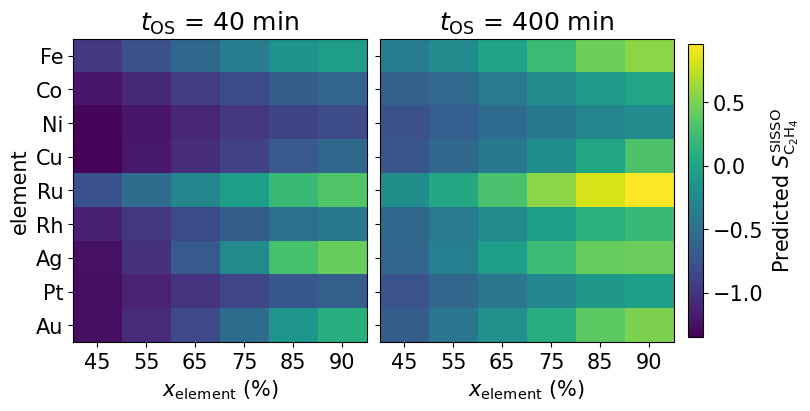

In [40]:
# Visualize the predicted ethylene selectivity for new hypothetical bimetallic materials

# The experimental parameters entering the SISSO model are unknown for new materials
# We assume that the metal loading and mean particle diameter of these materials are
# equal to the mean values among the materials in the training set
mean_total_metal_loading=0.011755658627087199
mean_particle_diameter=5.667903525046382

# One temperature and two time-on-stream values are chosen
temperature = 150  
time = [40,400] 

# Chosen range of stoichiometries
x_element=[0.45, 0.55, 0.65, 0.75, 0.85, 0.90]

rows = []
selectivities_40_min = []
selectivities_400_min = []

for element in elements:
    selectivity_40_min=[]
    selectivity_400_min=[]
    for x in x_element:
        x_str = f"{x:.1f}" 
        x_comp_str = f"{(1-x):.1f}"
        row={}
        row['material']='Pd'+x_comp_str+element+x_str
        for parameter in elemental_features:
            feature_value=df_elemental.at[element, parameter]*x+df_elemental.at['Pd', parameter]*(1-x)
            row['av_'+parameter]=feature_value
        row['S_ethylene_SISSO_40min_150C']=evaluate_SISSO_model_ethylene_selectivity(row['av_W_change_H'],
                                                                                     row['av_d_band_center_surf'],
                                                                                     row['av_BE_H_surf'],
                                                                                     row['av_E_def_subsurf'],
                                                                                     mean_total_metal_loading,
                                                                                     mean_particle_diameter,
                                                                                     row['av_BE_H_subsurf'],
                                                                                     time[0],
                                                                                     temperature)
        row['S_ethylene_SISSO_400min_150C']=evaluate_SISSO_model_ethylene_selectivity(row['av_W_change_H'],
                                                                                      row['av_d_band_center_surf'],
                                                                                      row['av_BE_H_surf'],
                                                                                      row['av_E_def_subsurf'],
                                                                                      mean_total_metal_loading,
                                                                                      mean_particle_diameter,
                                                                                      row['av_BE_H_subsurf'],
                                                                                      time[1],
                                                                                      temperature)
        rows.append(row)
        selectivity_40_min.append(row['S_ethylene_SISSO_40min_150C'])
        selectivity_400_min.append(row['S_ethylene_SISSO_400min_150C'])
    selectivities_40_min.append(selectivity_40_min)
    selectivities_400_min.append(selectivity_400_min)

df_new_bimetallic = pd.DataFrame(rows).set_index('material')

x_element_labels=[45, 55, 65, 75, 85, 90]
    
fig, (ax1,ax2) = plt.subplots(1,2, constrained_layout=True, figsize=(8,4))
im = ax1.imshow(selectivities_40_min ,cmap='viridis',vmin=-1.35, vmax=0.96, aspect='auto')
im2 = ax2.imshow(selectivities_400_min ,cmap='viridis',vmin=-1.35, vmax=0.96, aspect='auto')
ax1.set_ylabel('element')
ax1.set_xlabel('$x_{\mathrm{element}}$ (%)')
ax1.set_xticks(ticks=[0,1,2,3,4,5], labels=x_element_labels)
ax1.set_yticks(ticks=[0,1,2,3,4,5,6,7,8], labels=elements)
fig.colorbar(im2, ax=ax2, label='Predicted $S_{\mathrm{C_2H_4}}^{\mathrm{SISSO}}$', fraction=0.050, pad=0.05)
ax2.set_xlabel('$x_{\mathrm{element}}$ (%)')
ax2.set_xticks(ticks=[0,1,2,3,4,5], labels=x_element_labels)
ax2.set_yticks(ticks=[0,1,2,3,4,5,6,7,8], labels='')
ax1.set_title('$t_{\mathrm{OS}}$ = 40 min')
ax2.set_title('$t_{\mathrm{OS}}$ = 400 min')

# Experimental Verification of SISSO Model Predictions for the Materials Pd1Ag12, Pd1Ag15, and Pd1Ag5Cu1

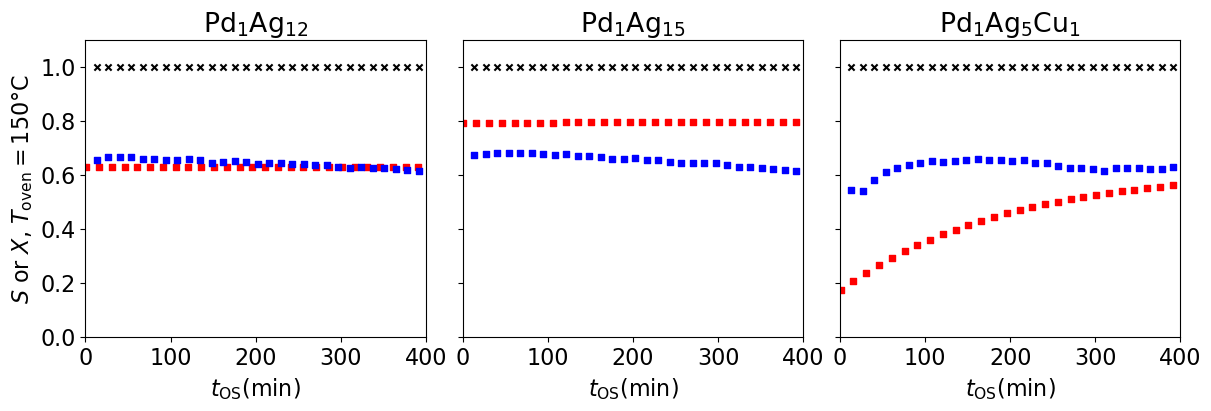

In [42]:
# Load data
data_new = pd.read_csv('./data/performance_data_new_materials.csv')

# Set plotting parameters
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)
size = 20
time = np.arange(1, 400, 15)

# Define composition and physical parameters
compositions = [
    {'label': 'Pd_Ag_1_12_150', 'comp': {'Pd': 1/13, 'Ag': 12/13}, 'd': 6.03, 'm': 0.0153, 'ax': ax1, 'title': 'Pd$_1$Ag$_{12}$'},
    {'label': 'Pd_Ag_1_15_150', 'comp': {'Pd': 1/16, 'Ag': 15/16}, 'd': 7.04, 'm': 0.0161, 'ax': ax2, 'title': 'Pd$_1$Ag$_{15}$'},
    {'label': 'Pd_Ag_Cu_1_5_1_150', 'comp': {'Pd': 1/7, 'Ag': 5/7, 'Cu': 1/7}, 'd': 5.80, 'm': 0.0145, 'ax': ax3, 'title': 'Pd$_1$Ag$_5$Cu$_1$'}
]

# Loop over each composition
for cond in compositions:
    comp = cond['comp']
    ax = cond['ax']
    
    # Compute weighted average properties
    av_W_change_H = sum(comp[e] * df_elemental.at[e, 'W_change_H'] for e in comp)
    av_d_band_center_surf = sum(comp[e] * df_elemental.at[e, 'd_band_center_surf'] for e in comp)
    av_BE_H_surf = sum(comp[e] * df_elemental.at[e, 'BE_H_surf'] for e in comp)
    av_E_def_subsurf = sum(comp[e] * df_elemental.at[e, 'E_def_subsurf'] for e in comp)
    av_BE_H_subsurf = sum(comp[e] * df_elemental.at[e, 'BE_H_subsurf'] for e in comp)

    # Predict using SISSO model
    predictions = []
    for t in time:
        y = evaluate_SISSO_model_ethylene_selectivity(
            av_W_change_H,
            av_d_band_center_surf,
            av_BE_H_surf,
            av_E_def_subsurf,
            cond['m'],
            cond['d'],
            av_BE_H_subsurf,
            t,
            150
        )
        predictions.append(y)
    
    # Plot SISSO predictions
    ax.scatter(time, predictions, color='red', s=size, marker='s')
    
    # Plot experimental data
    data = data_new[data_new['material_Temperature'] == cond['label']]
    ax.scatter(data['time (min)'], data['X_acetylene'], color='k', s=size, marker='x')
    ax.scatter(data['time (min)'], data['S_ethylene'], color='blue', s=size, marker='s')
    
    # Axis formatting
    ax.set_xlim(0, 400)
    ax.set_ylim(0, 1.1)
    ax.hlines(0, 0, 400, color='k', linewidth=0.5)
    ax.set_xlabel('$t_{\mathrm{OS}}$(min)')
    ax.set_title(cond['title'])

# Add common y-label and clean up redundant ticks
ax1.set_ylabel('$S$ or $X$, $T_{\mathrm{oven}}=150\degree$C')
ax2.set_yticklabels([])
ax3.set_yticklabels([])

plt.show()

# Additional Resources

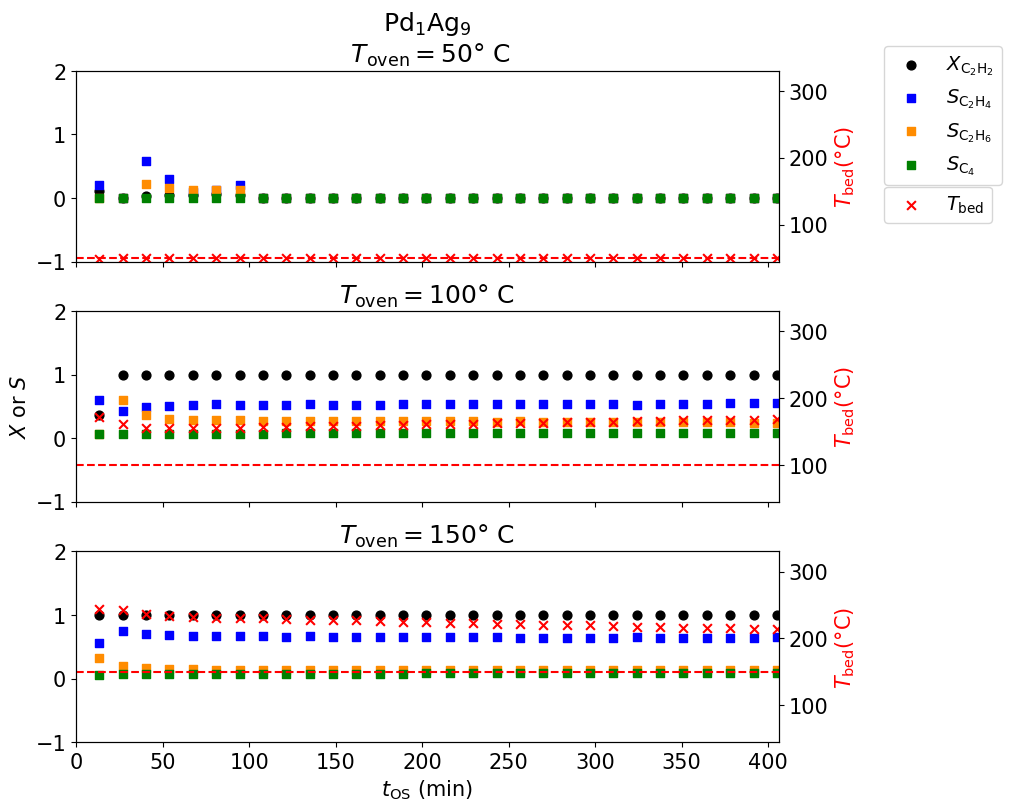

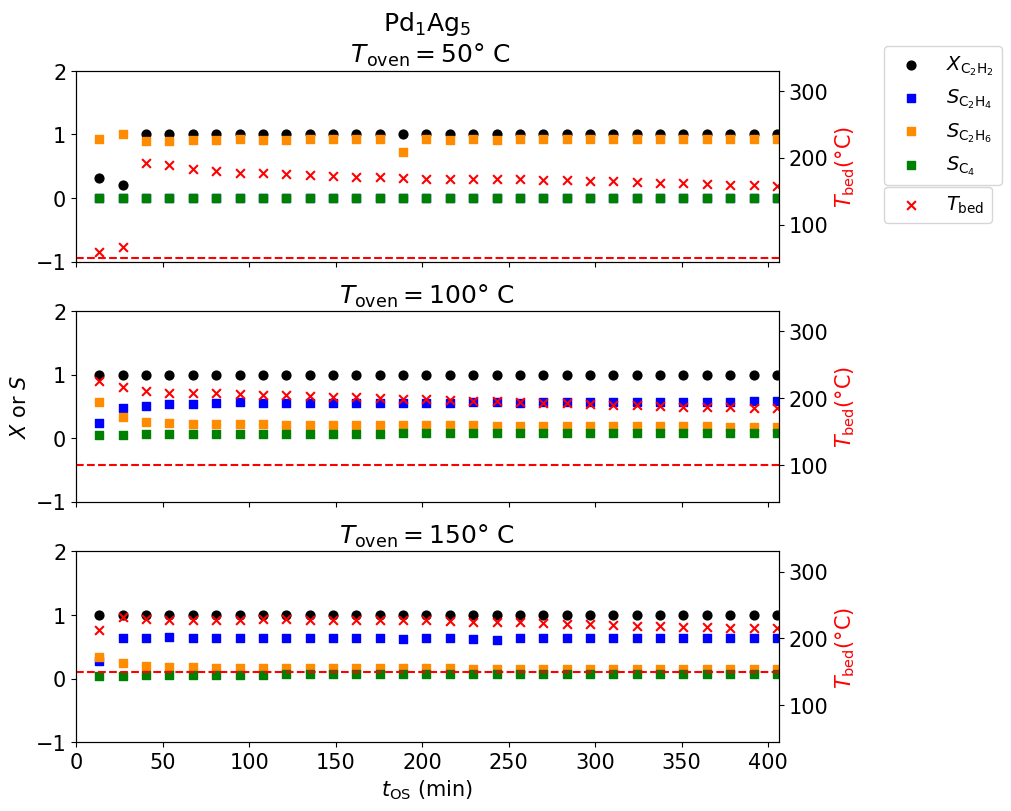

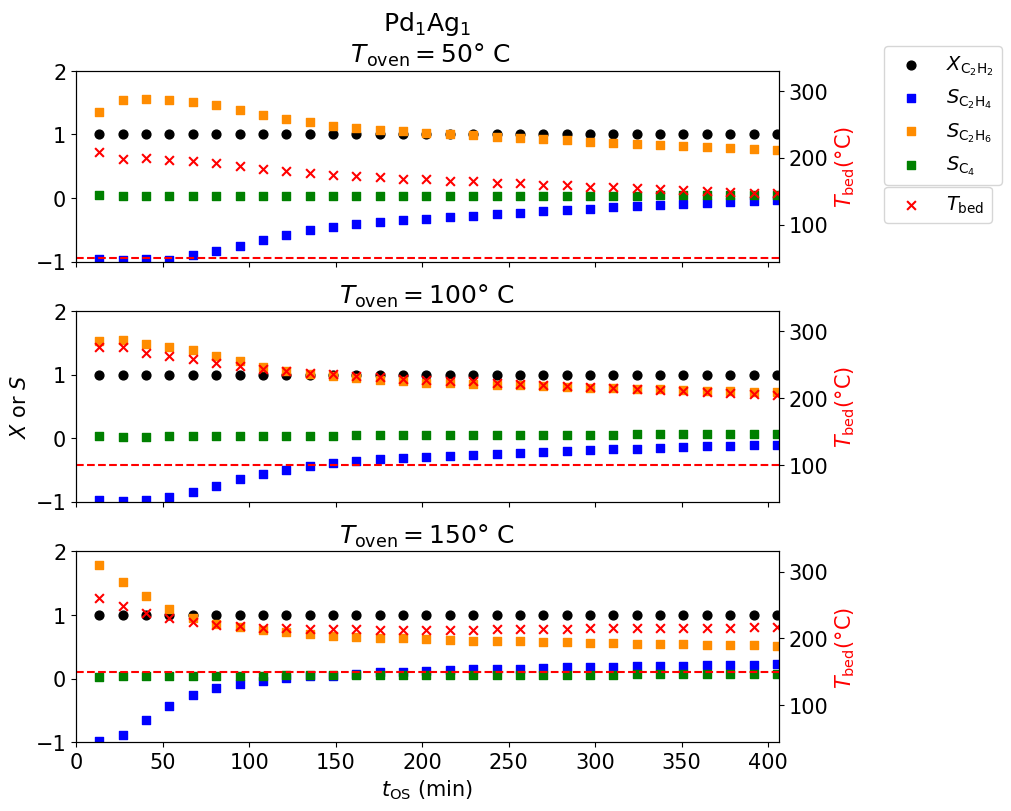

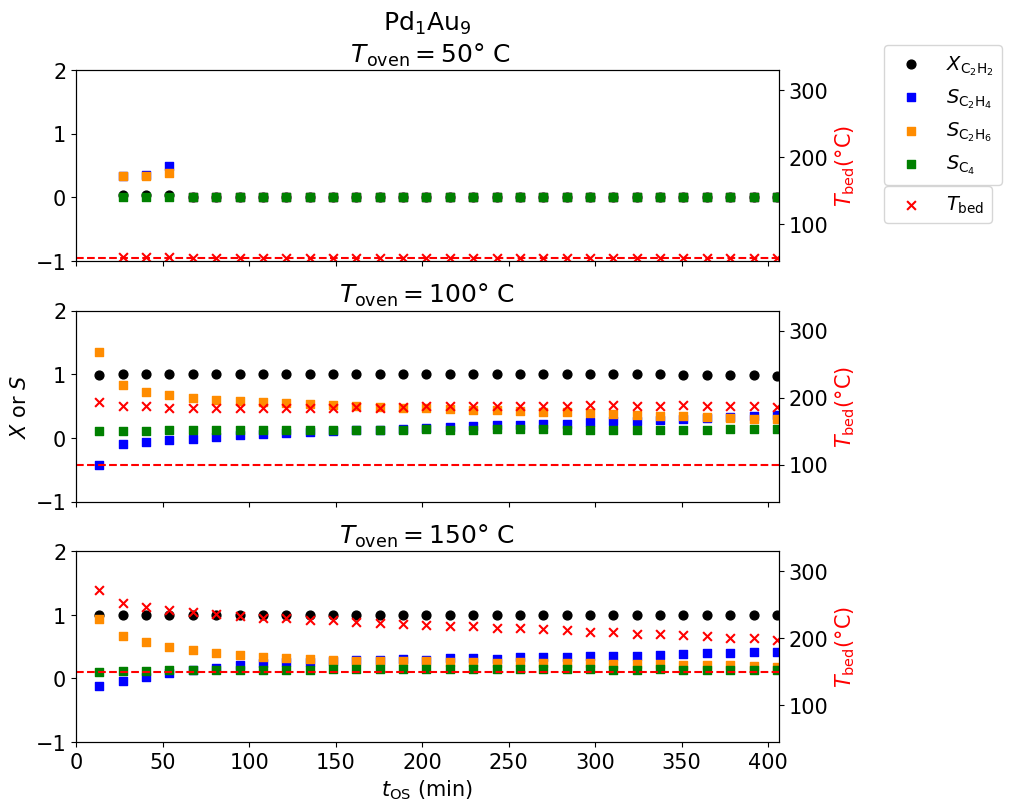

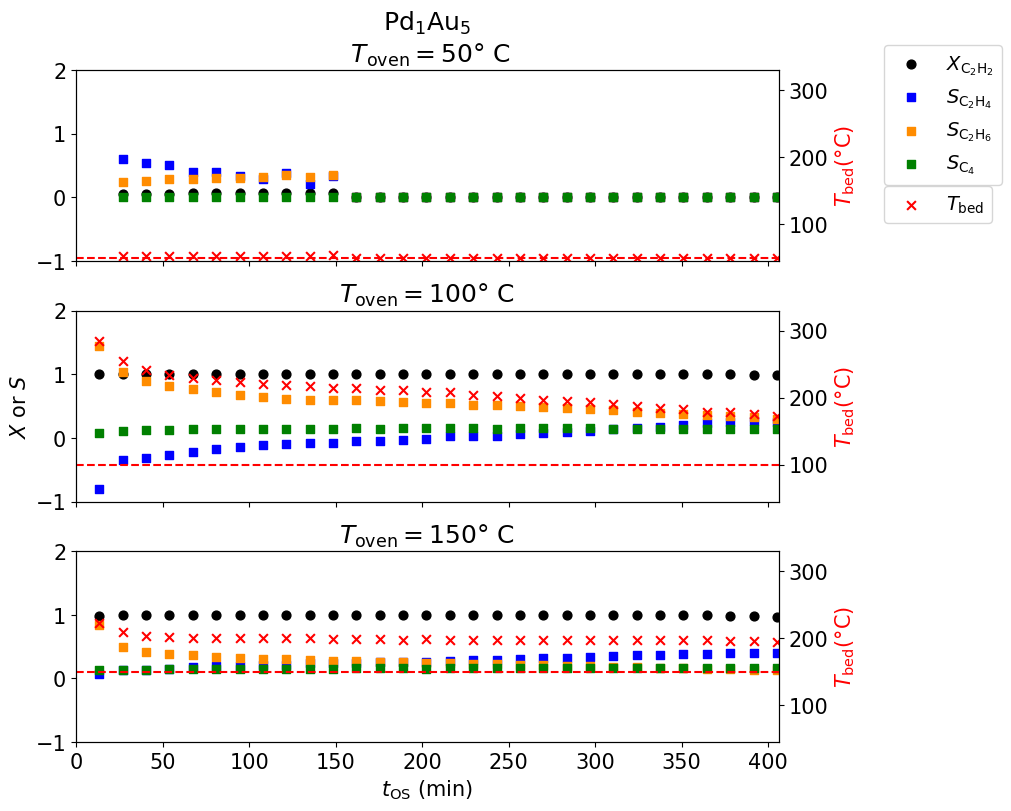

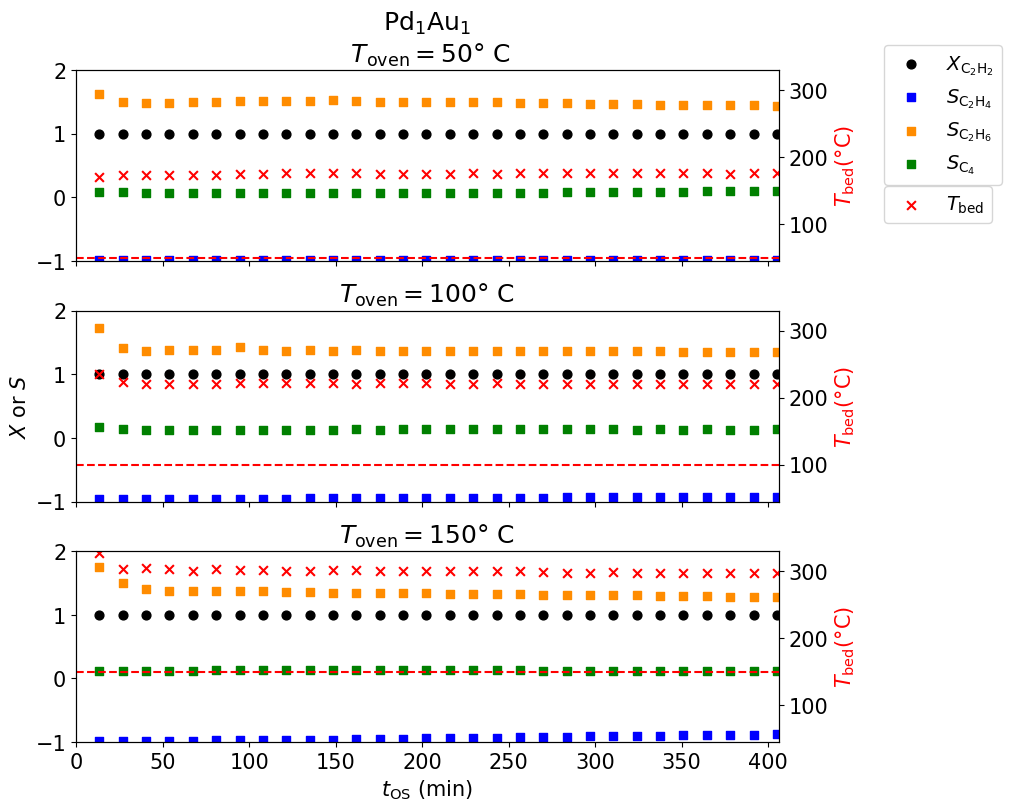

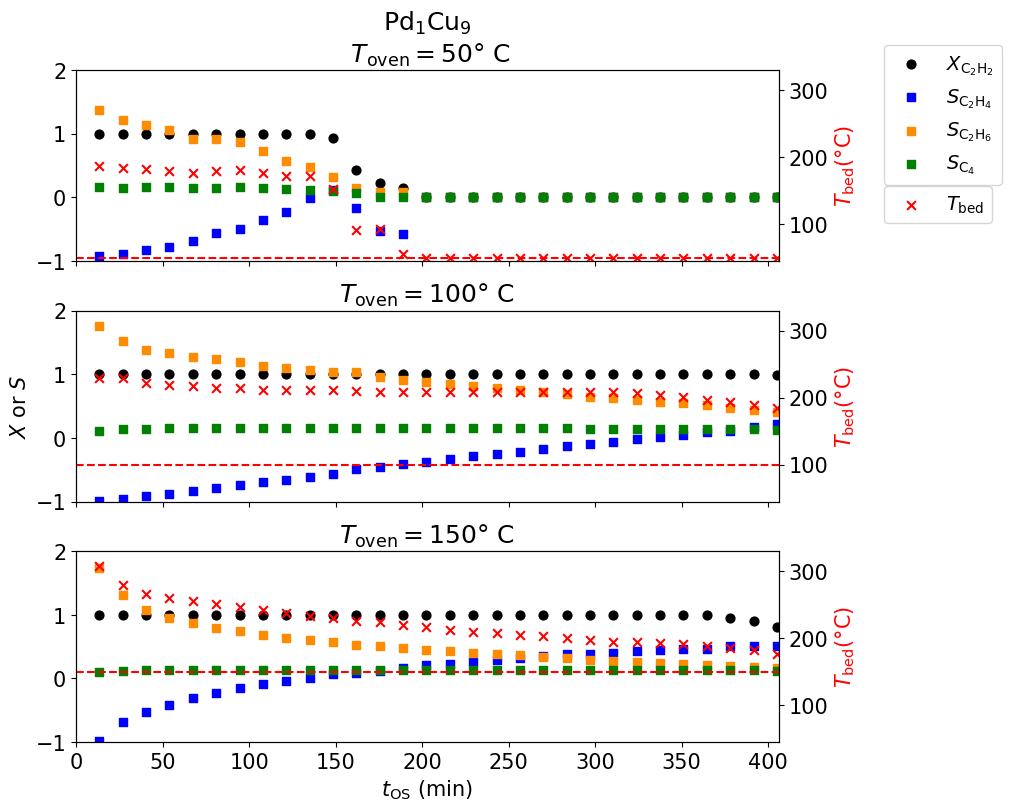

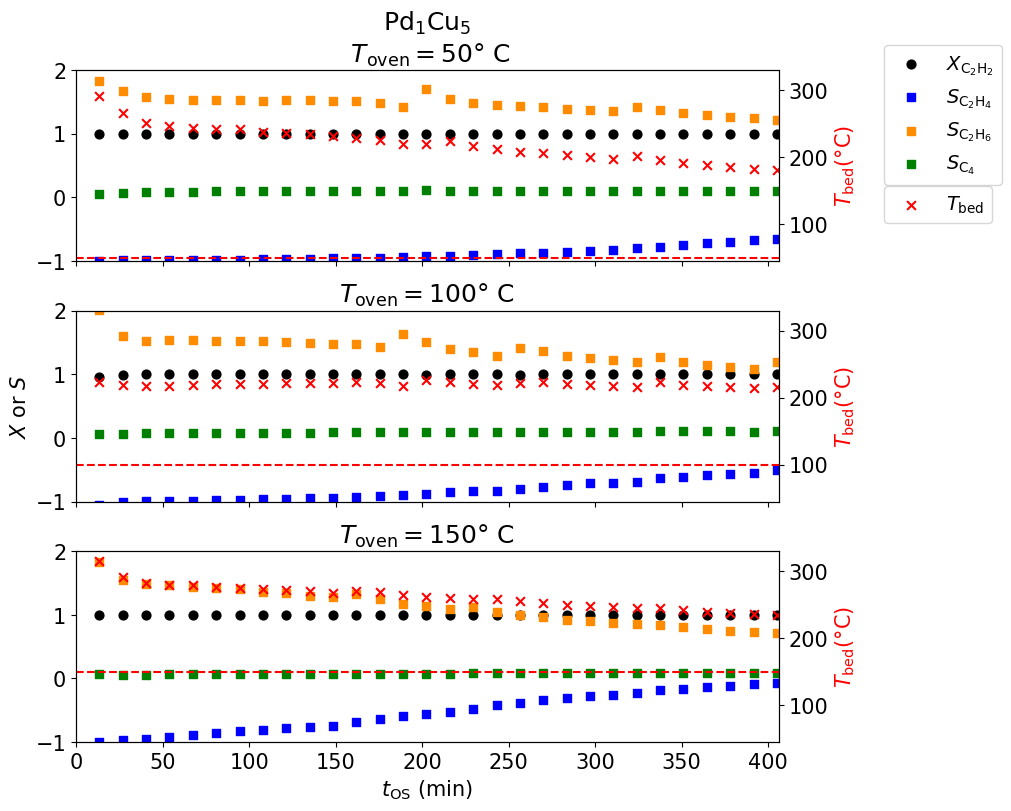

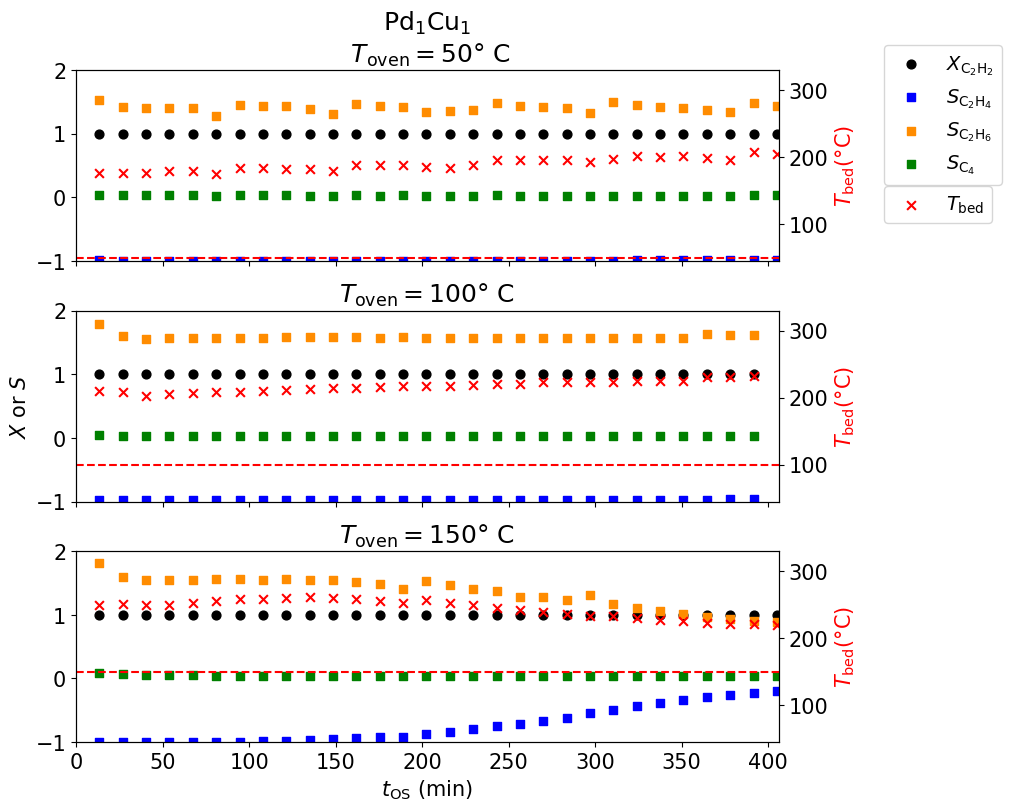

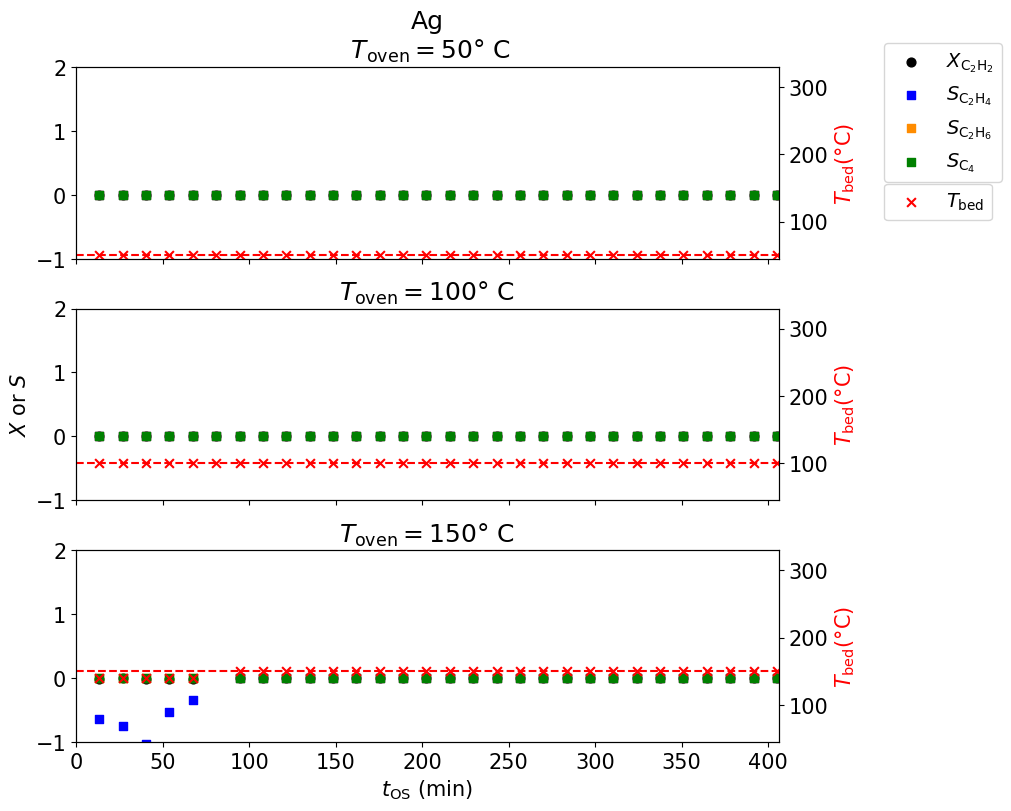

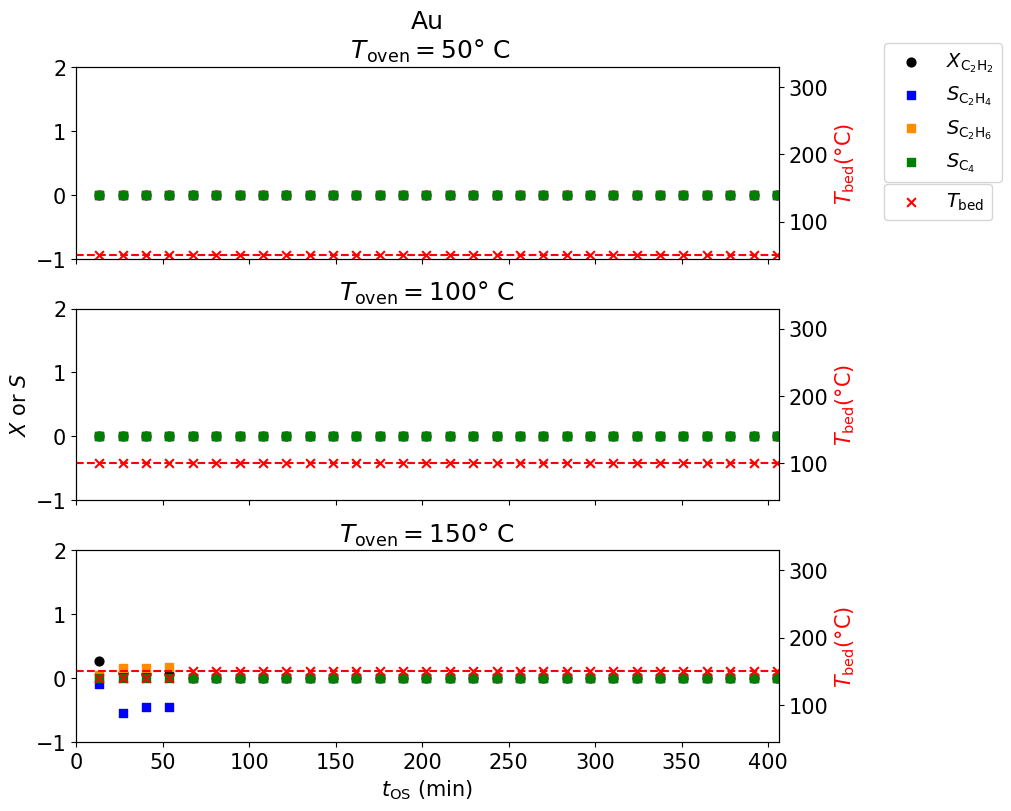

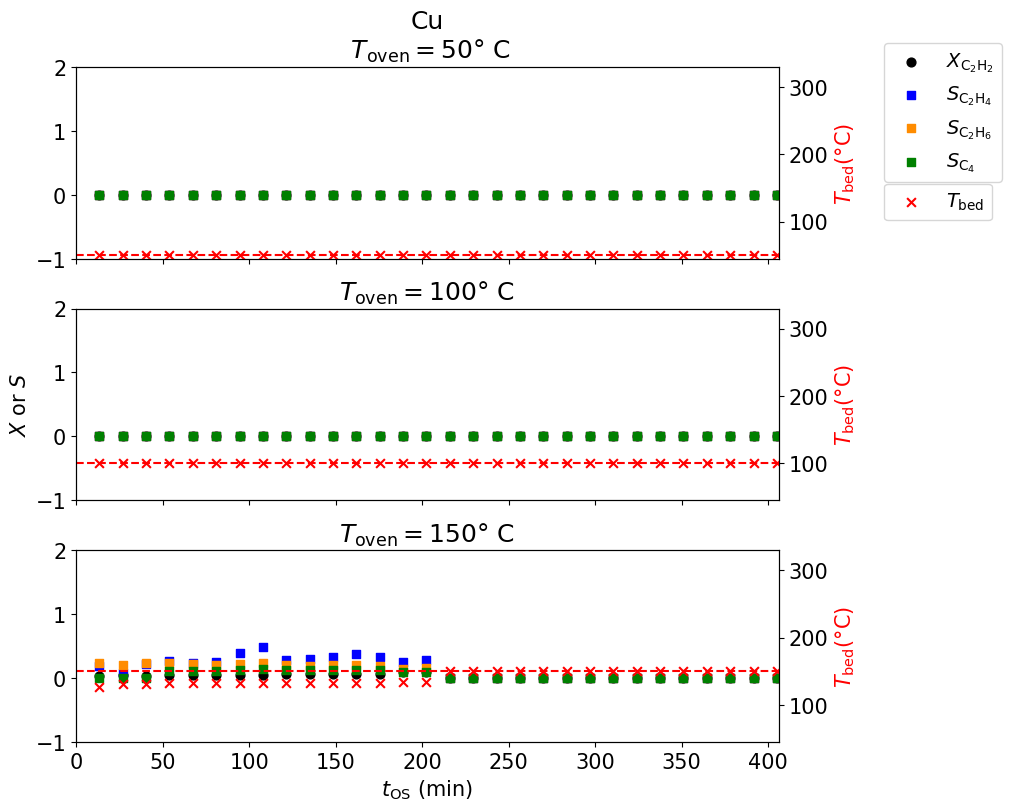

In [43]:
# Visualization of the detailed performance for all materials in the training set

plt.rcParams.update({'font.size': 15})
size = 40
temps = [50, 100, 150]
colors = {
    'X_acetylene': 'k',
    'S_ethylene': 'blue',
    'S_ethane': 'darkorange',
    'S_C4': 'green',
}
markers = {
    'X_acetylene': 'o',
    'S_ethylene': 's',
    'S_ethane': 's',
    'S_C4': 's',
}
temp_lines = [50, 100, 150]

for i, catalyst in enumerate(catalyst_list):
    # Create 3 vertically stacked subplots with shared x-axis, and their twins for temperature
    fig, axes = plt.subplots(3, 1, constrained_layout=True, figsize=(10, 8))
    twin_axes = [ax.twinx() for ax in axes]

    # Set common limits for main axes and twin axes
    for ax, twin_ax in zip(axes, twin_axes):
        ax.set_xlim(0, 406)
        ax.set_ylim(-1, 2)
        twin_ax.set_ylim(45, 330)

    # Axis labels and legends setup
    axes[1].set_ylabel('$X$ or $S$')
    for twin_ax in twin_axes:
        twin_ax.set_ylabel('$T_{\\mathrm{bed}} (\\mathrm{\\degree C})$', color='red')

    axes[2].set_xlabel('$t_{\\mathrm{OS}}$ (min)')
    axes[0].set_xticklabels([])
    axes[1].set_xticklabels([])

    # Plotting loop for each temperature subplot
    for ax, twin_ax, T in zip(axes, twin_axes, temps):
        # Filter data for catalyst and temperature
        data = df_initial.loc[df_initial['material_Temperature'] == f'{catalyst}_{T}']
        
        # Title for the first subplot includes catalysevaluate_SISSO_model_ethylene_selectivityt caption
        if T == 50:
            ax.set_title(f'{catalyst_list_caption[i]}\n $T_{{\\mathrm{{oven}}}}={T}\\mathrm{{\\degree}}$ C')
        else:
            ax.set_title(f'$T_{{\\mathrm{{oven}}}}={T}\\mathrm{{\\degree}}$ C')

        # Plot conversion/selectivities
        for col, color in colors.items():
            ax.scatter(data['time (min)'], data[col], color=color, s=size, marker=markers[col])

        # Plot temperature on twin axis
        twin_ax.scatter(data['time (min)'], data['T_catbed (C)'], color='red', s=size, marker='x')

    # Legends outside loop to avoid duplicates
    axes[0].legend(
        ['$X_{\\mathrm{C_2H_2}}$', '$S_{\\mathrm{C_2H_4}}$', '$S_{\\mathrm{C_2H_6}}$', '$S_{\\mathrm{C_4}}$'],
        frameon=True, fontsize=14, loc=(1.15, 0.4)
    )
    twin_axes[0].legend(['$T_{\\mathrm{bed}}$'], loc=(1.15, 0.2), frameon=True, fontsize=14)

    # Add horizontal dashed lines on twin axes to mark oven temperatures
    for twin_ax, T_line in zip(twin_axes, temp_lines):
        twin_ax.hlines(T_line, 0, 406, linestyle='dashed', color='red')